## Extended Common Load Modelling : example

Import the required modules

In [3]:
%matplotlib inline
import openturns as ot
from openturns.viewer import View

We consider a common cause failure (CCF) groupe with *n=7* identical and independent components. The total impact vector of this CCF group is estimated after N=1002100 demands or tests on the group.
$$
V_t^{n,N} = [1000000, 2000, 200, 30, 20, 5, 0, 0]
$$

In [4]:
n = 7
vectImpactTotal = ot.Indices(n+1)
vectImpactTotal[0] = 1000000
vectImpactTotal[1] = 2000
vectImpactTotal[2] = 200
vectImpactTotal[3] = 30
vectImpactTotal[4] = 20
vectImpactTotal[5] = 5
vectImpactTotal[6] = 0
vectImpactTotal[7] = 0

Create the ECLM class. We will use the Gauss Legendre quadrature algorithm to compute all the integrals of the ECLM model. The use of 50 points is sufficicient to reach a good precision.

In [5]:
myECLM = otECLM.ECLM(vectImpactTotal, ot.GaussLegendre([50]))

**Estimate the optimal parameter**

We use the Mankamo assumption. We use the maximum likelihood estimators of the *Mankamo parameter*. We want to get all the graphs of the likelihood function at the optimal Mankamo parameter.

We start by verifying that our starting point $(P_x, C_{co}, c_x)$ for the optimization algorithm verifies the constraints!

In [6]:
startingPoint = [5.0e-3, 0.51, 0.85]
print(myECLM.verifyMankamoConstraints(startingPoint))

False


If the point is not valid, we can ask for a valid one by giving $C_x$.

In [7]:
startingPoint = myECLM.computeValidMankamoStartingPoint(0.7)
startingPoint

class=Point name=Unnamed dimension=3 values=[0.00018494,0.35,0.7]

Anyway, if the starting point is not valid, the function *estimateMaxLikelihoodFromMankamo* will automatically change it by itself.

In [7]:
visuLikelihood = True
mankamoParam, generalParam, finalLogLikValue, graphesCol = myECLM.estimateMaxLikelihoodFromMankamo(startingPoint, visuLikelihood, verbose=False)
print('Mankamo parameter : ', mankamoParam)
print('general parameter : ', generalParam)
print('finalLogLikValue : ', finalLogLikValue)

Production of graphs
graph (Cco, Cx) = (Cco_optim, Cx_optim)
graph (logPx, Cx) = (logPx_optim, Cx_optim)
graph (logPx, Cco) = (logPx_optim, Cco_optim)
graph Cx = Cx_optim
graph Cco = Cco_optim
graph logPx = logPx_optim
Mankamo parameter :  [0.00036988020585009376, 0.00012801117569704847, 0.025288469742997276, 0.02528847074299728]
general parameter :  [0.999208605667303, 0.045573412757286255, 0.04557341368173514, 0.2829360776452818, 0.7170639223547182]
finalLogLikValue :  -21687.943415363392


/home/E13645/otconda3/lib/python3.8/site-packages/openturns/viewer.py:437: UserWarning: No contour levels were found within the data range.
  contourset = self._ax[0].contour(X, Y, Z, **contour_kw)


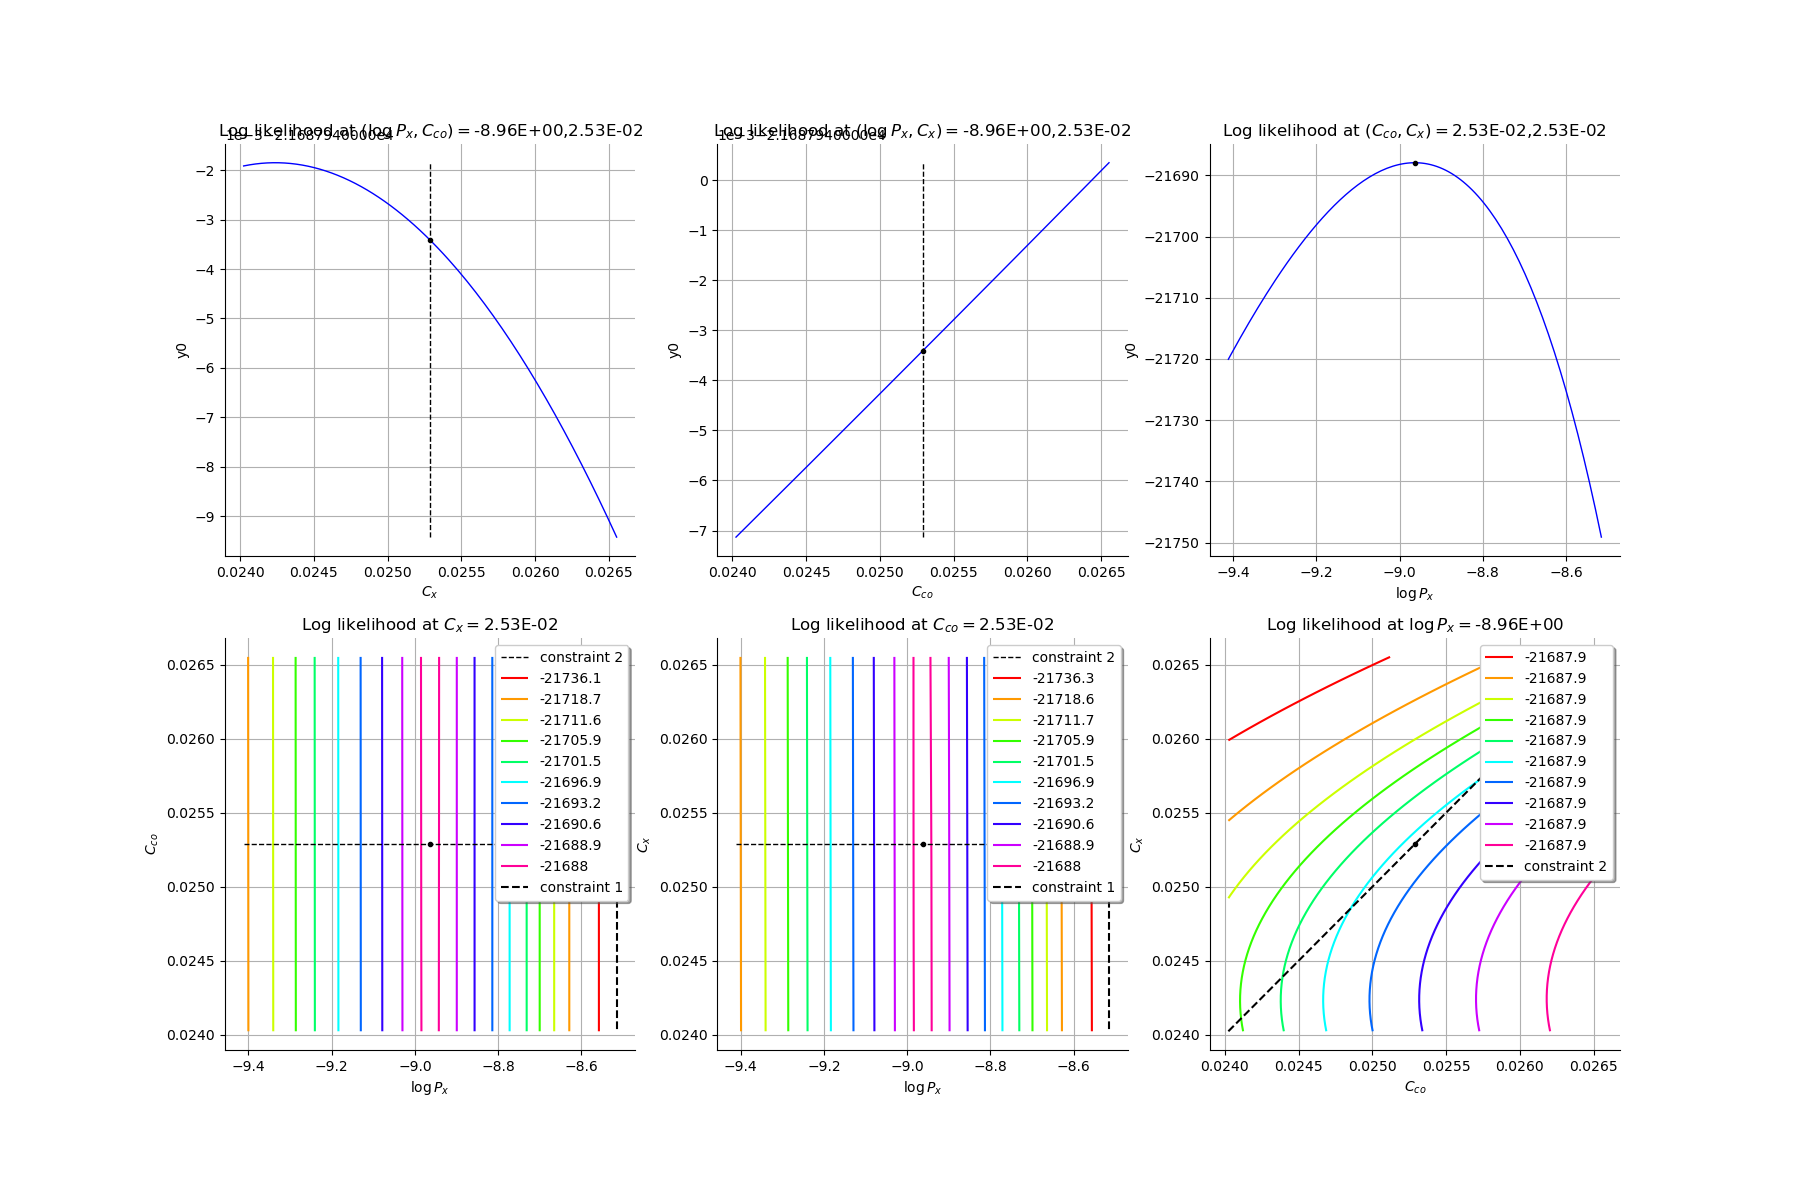

In [8]:
gl = ot.GridLayout(2,3)
for i in range(6):
    gl.setGraph(i//3, i%3, graphesCol[i])
gl

**Compute the ECLM probabilities**

In [8]:
PEG_list = myECLM.computePEGall()
print('PEG_list = ', PEG_list)
print('')

PSG_list = myECLM.computePSGall()
print('PSG_list = ', PSG_list)
print('')

PES_list = myECLM.computePESall()
print('PES_list = ', PES_list)
print('')

PTS_list = myECLM.computePTSall()
print('PTS_list = ', PTS_list)

PEG_list =  [0.9977951319717163, 0.00028436502415618765, 5.6292962755304796e-06, 1.2524690066143626e-06, 7.155524783440694e-07, 6.762697760203756e-07, 1.0052559693098889e-06, 2.465736909085783e-06]

PSG_list =  [0.9999964873085601, 0.00036988020585010346, 3.330188060788197e-05, 1.4659058362438232e-05, 8.225866623420648e-06, 5.152518623725936e-06, 3.4709928783956725e-06, 2.465736909085783e-06]

PES_list =  [0.9977951319717163, 0.0019905551690933138, 0.00011821522178614006, 4.383641523150269e-05, 2.504433674204243e-05, 1.4201665296427888e-05, 7.036791785169222e-06, 2.465736909085783e-06]

PTS_list =  [0.99999648730856, 0.0022013553368436817, 0.00021080016775036807, 9.258494596422802e-05, 4.874853073272532e-05, 2.370419399068289e-05, 9.502528694255006e-06, 2.465736909085783e-06]


**Generate a sample of the parameters by Bootstrap**

We use the bootstrap sampling to get a sample of total impact vectors. Each total impact vector value is associated to an optimal Mankamo parameter and an optimal general parameter.
We fix the size of the bootstrap sample.
We also fix the number of realisations after which the sample is saved.
Each optimisation problem is initalised with the optimal parameter found for the total impact vector.

The sample is generated and saved in a csv file.

In [13]:
Nbootstrap = 100
blockSize = 256

In [14]:
startingPoint = mankamoParam[1:4]
fileNameSampleParam = 'sampleParamFromMankamo_{}.csv'.format(Nbootstrap)
myECLM.estimateBootstrapParamSampleFromMankamo(Nbootstrap, startingPoint, blockSize, fileNameSampleParam)


Create the sample of all the ECLM probabilities associated to the sample of the parameters.

In [15]:
fileNameECLMProbabilities = 'sampleECLMProbabilitiesFromMankamo_{}.csv'.format(Nbootstrap)
myECLM.computeECLMProbabilitiesFromMankano(blockSize, fileNameSampleParam, fileNameECLMProbabilities)


**Graphically analyse the bootstrap sample of parameters**

We create the Pairs graphs of the Mankamo and general parameters.

In [16]:
graphPairsMankamoParam, graphPairsGeneralParam, graphMarg_list, descParam = myECLM.analyseGraphsECLMParam(fileNameSampleParam)

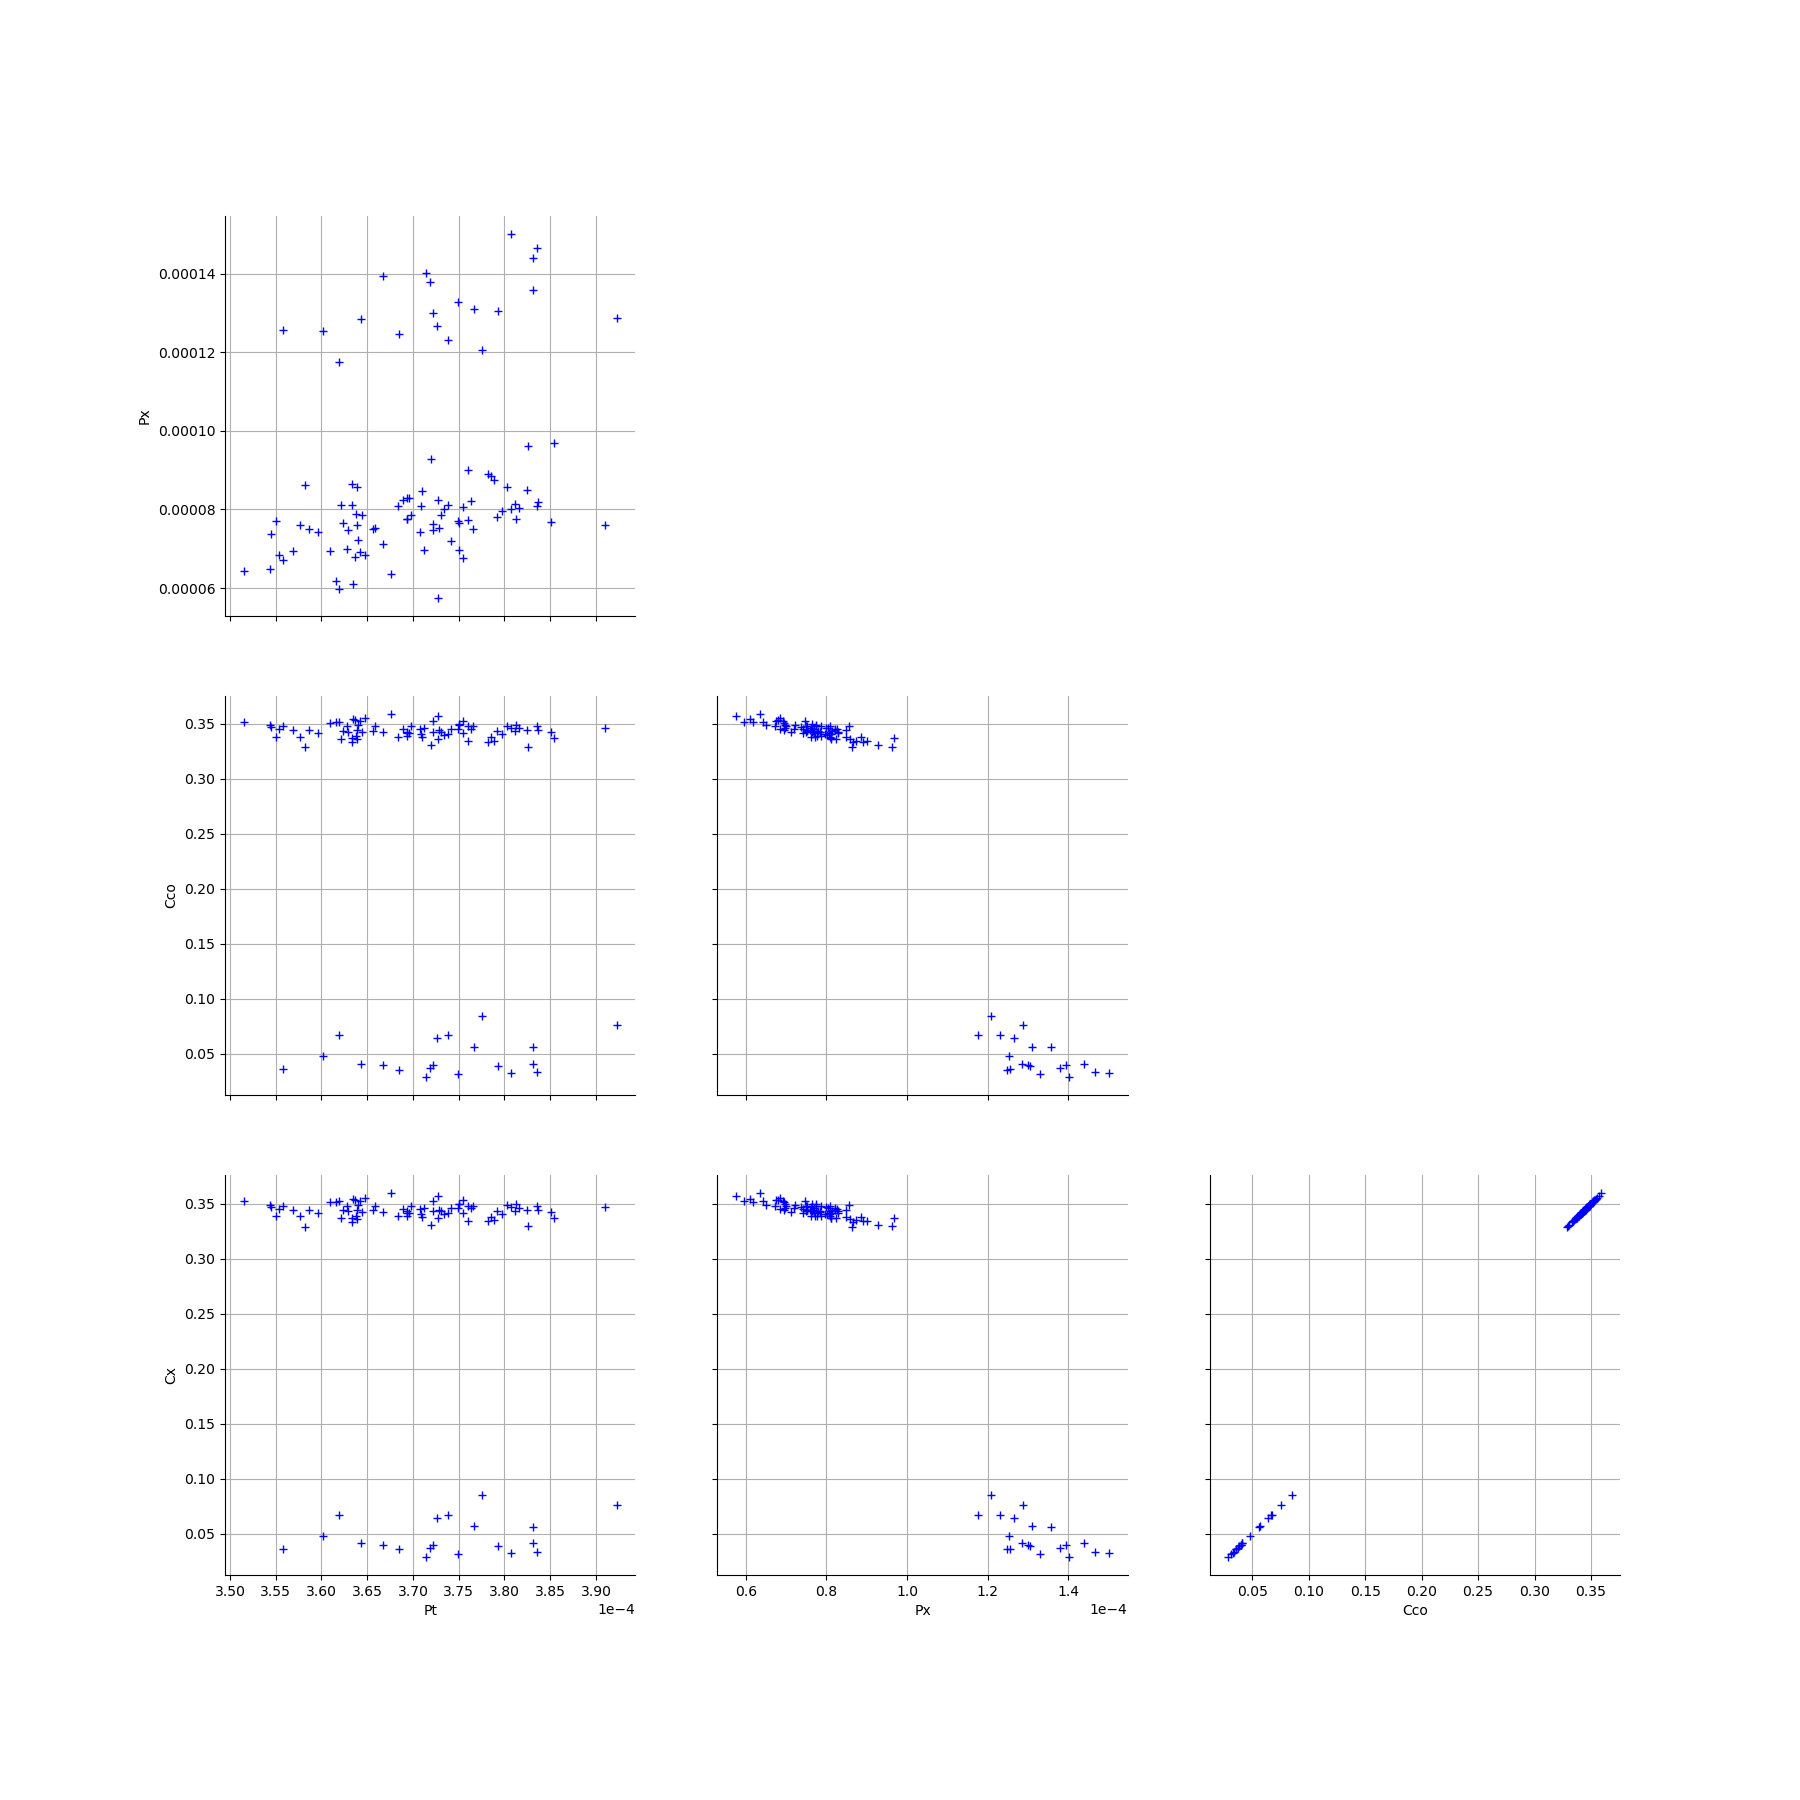

In [17]:
graphPairsMankamoParam

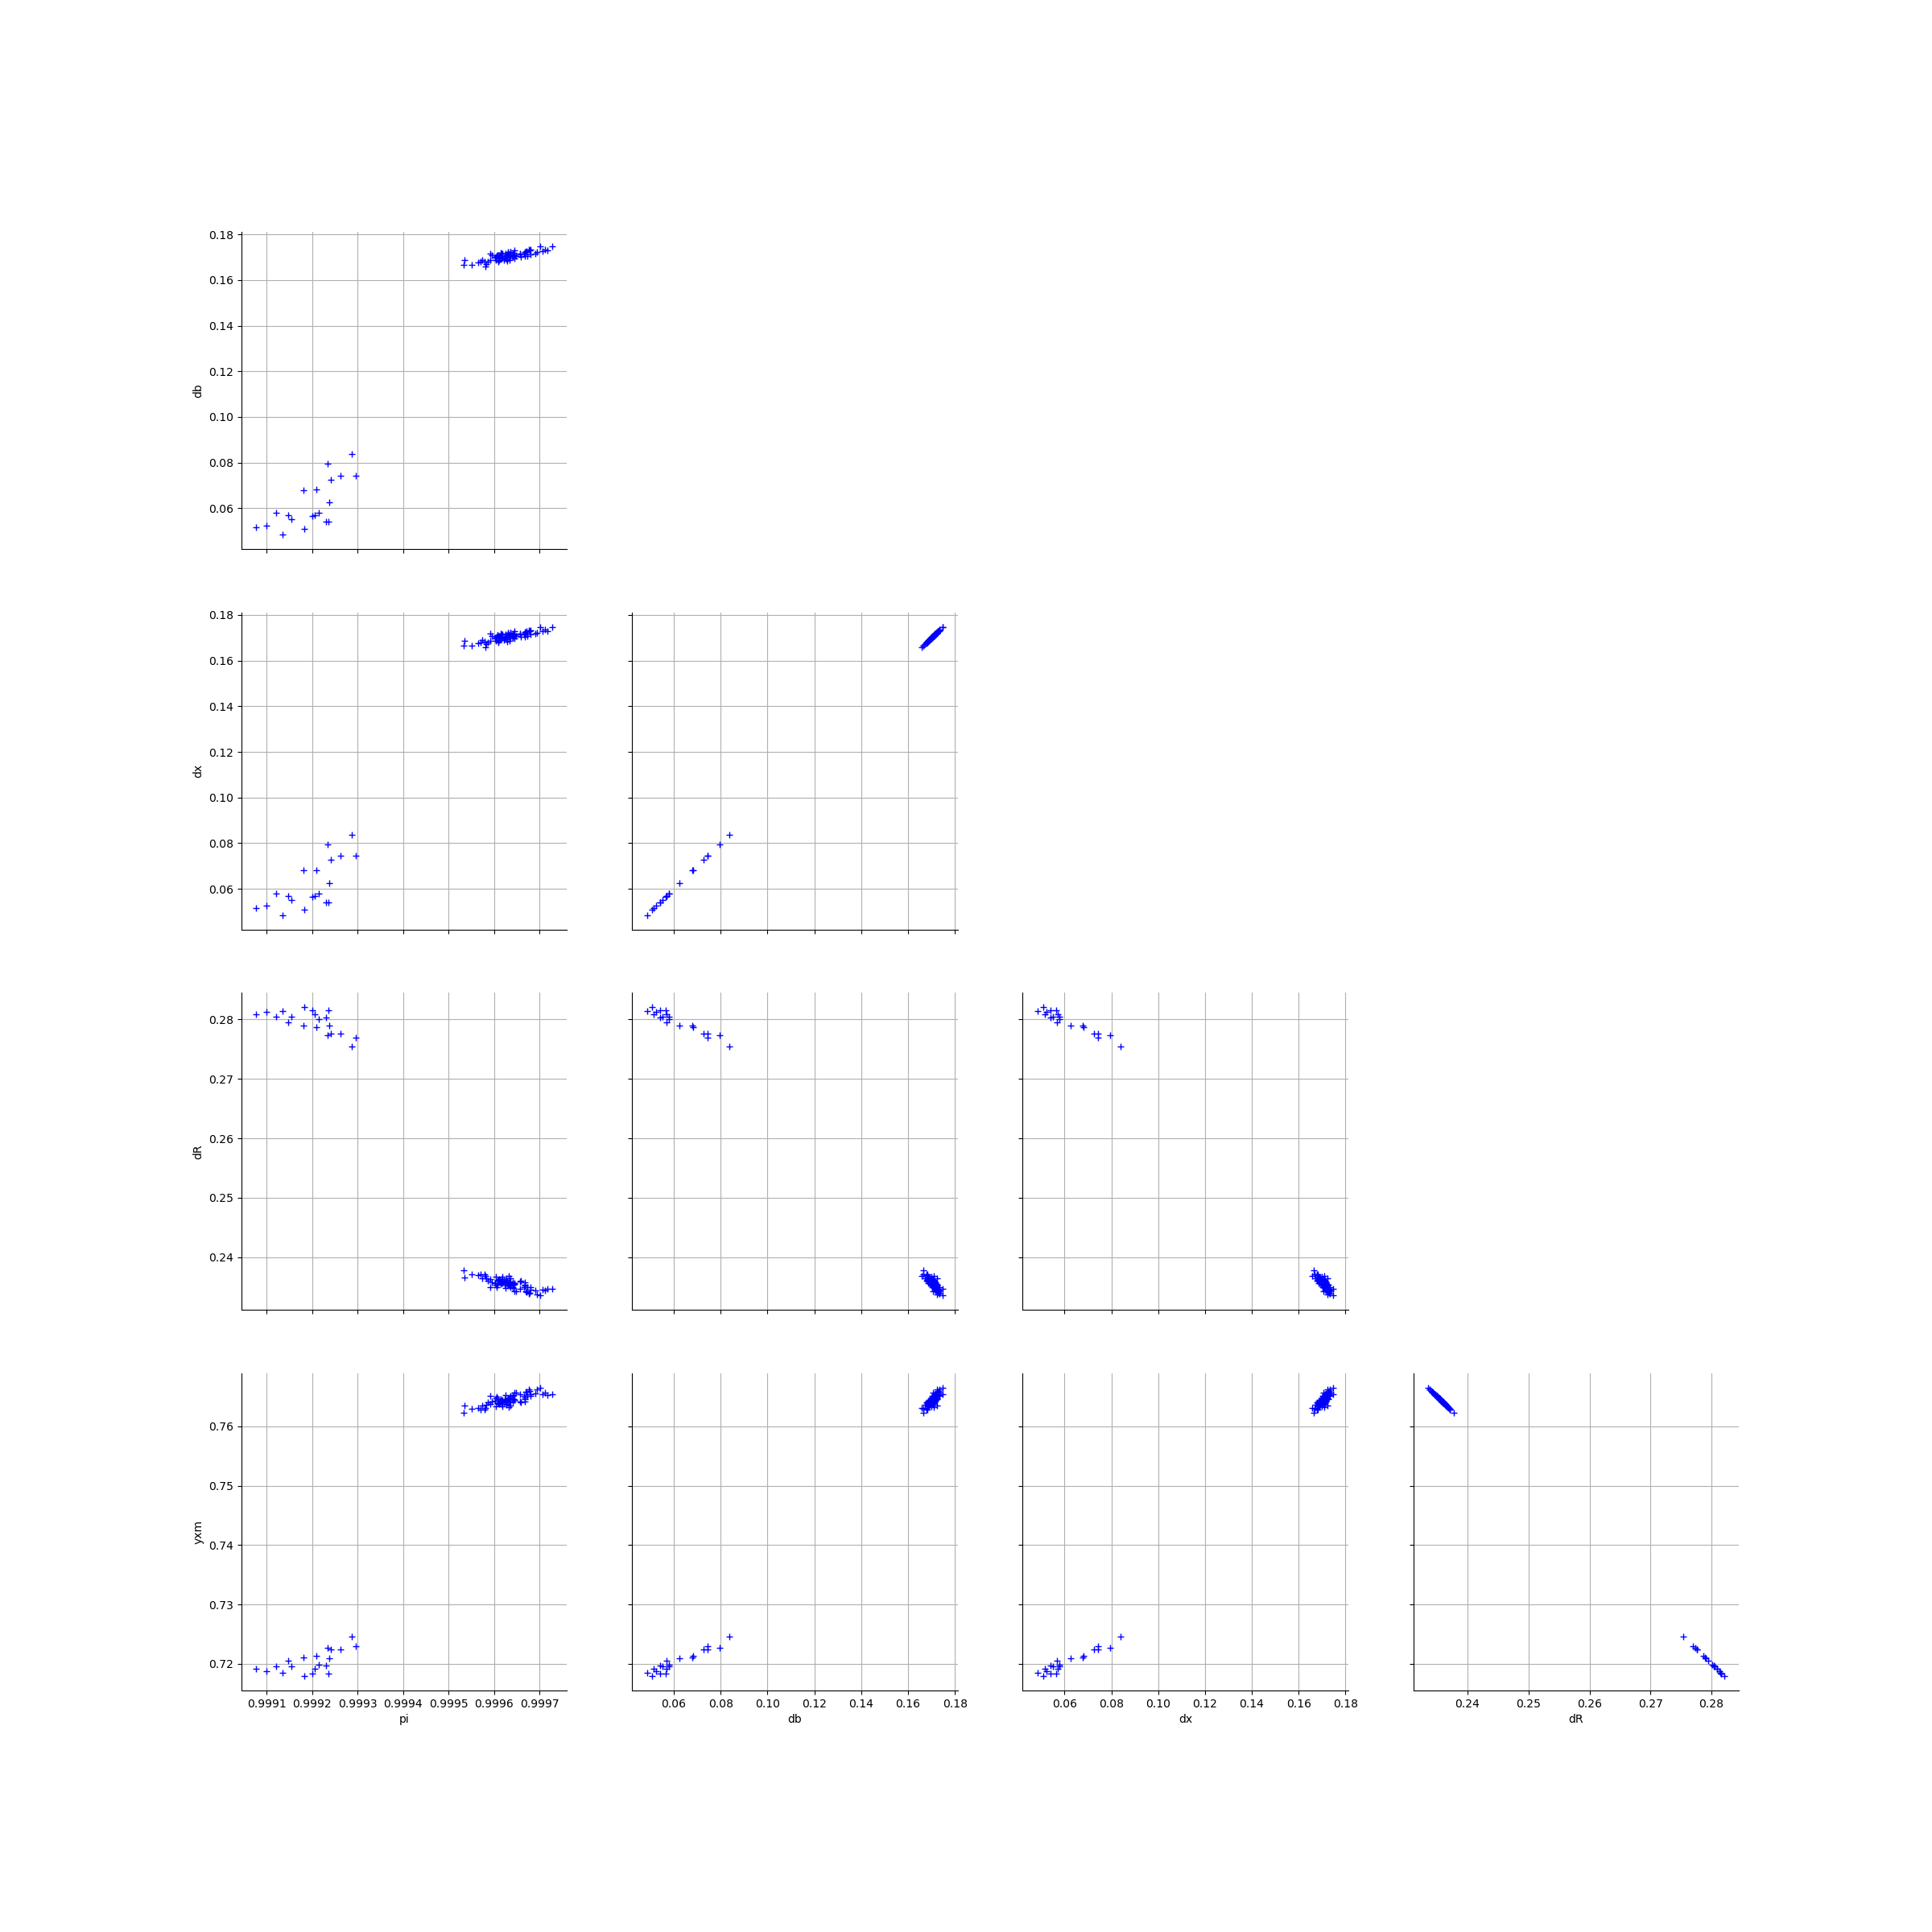

In [18]:
graphPairsGeneralParam

We estimate the  distribution of each parameter with a Histogram and a normal kernel smoothing.

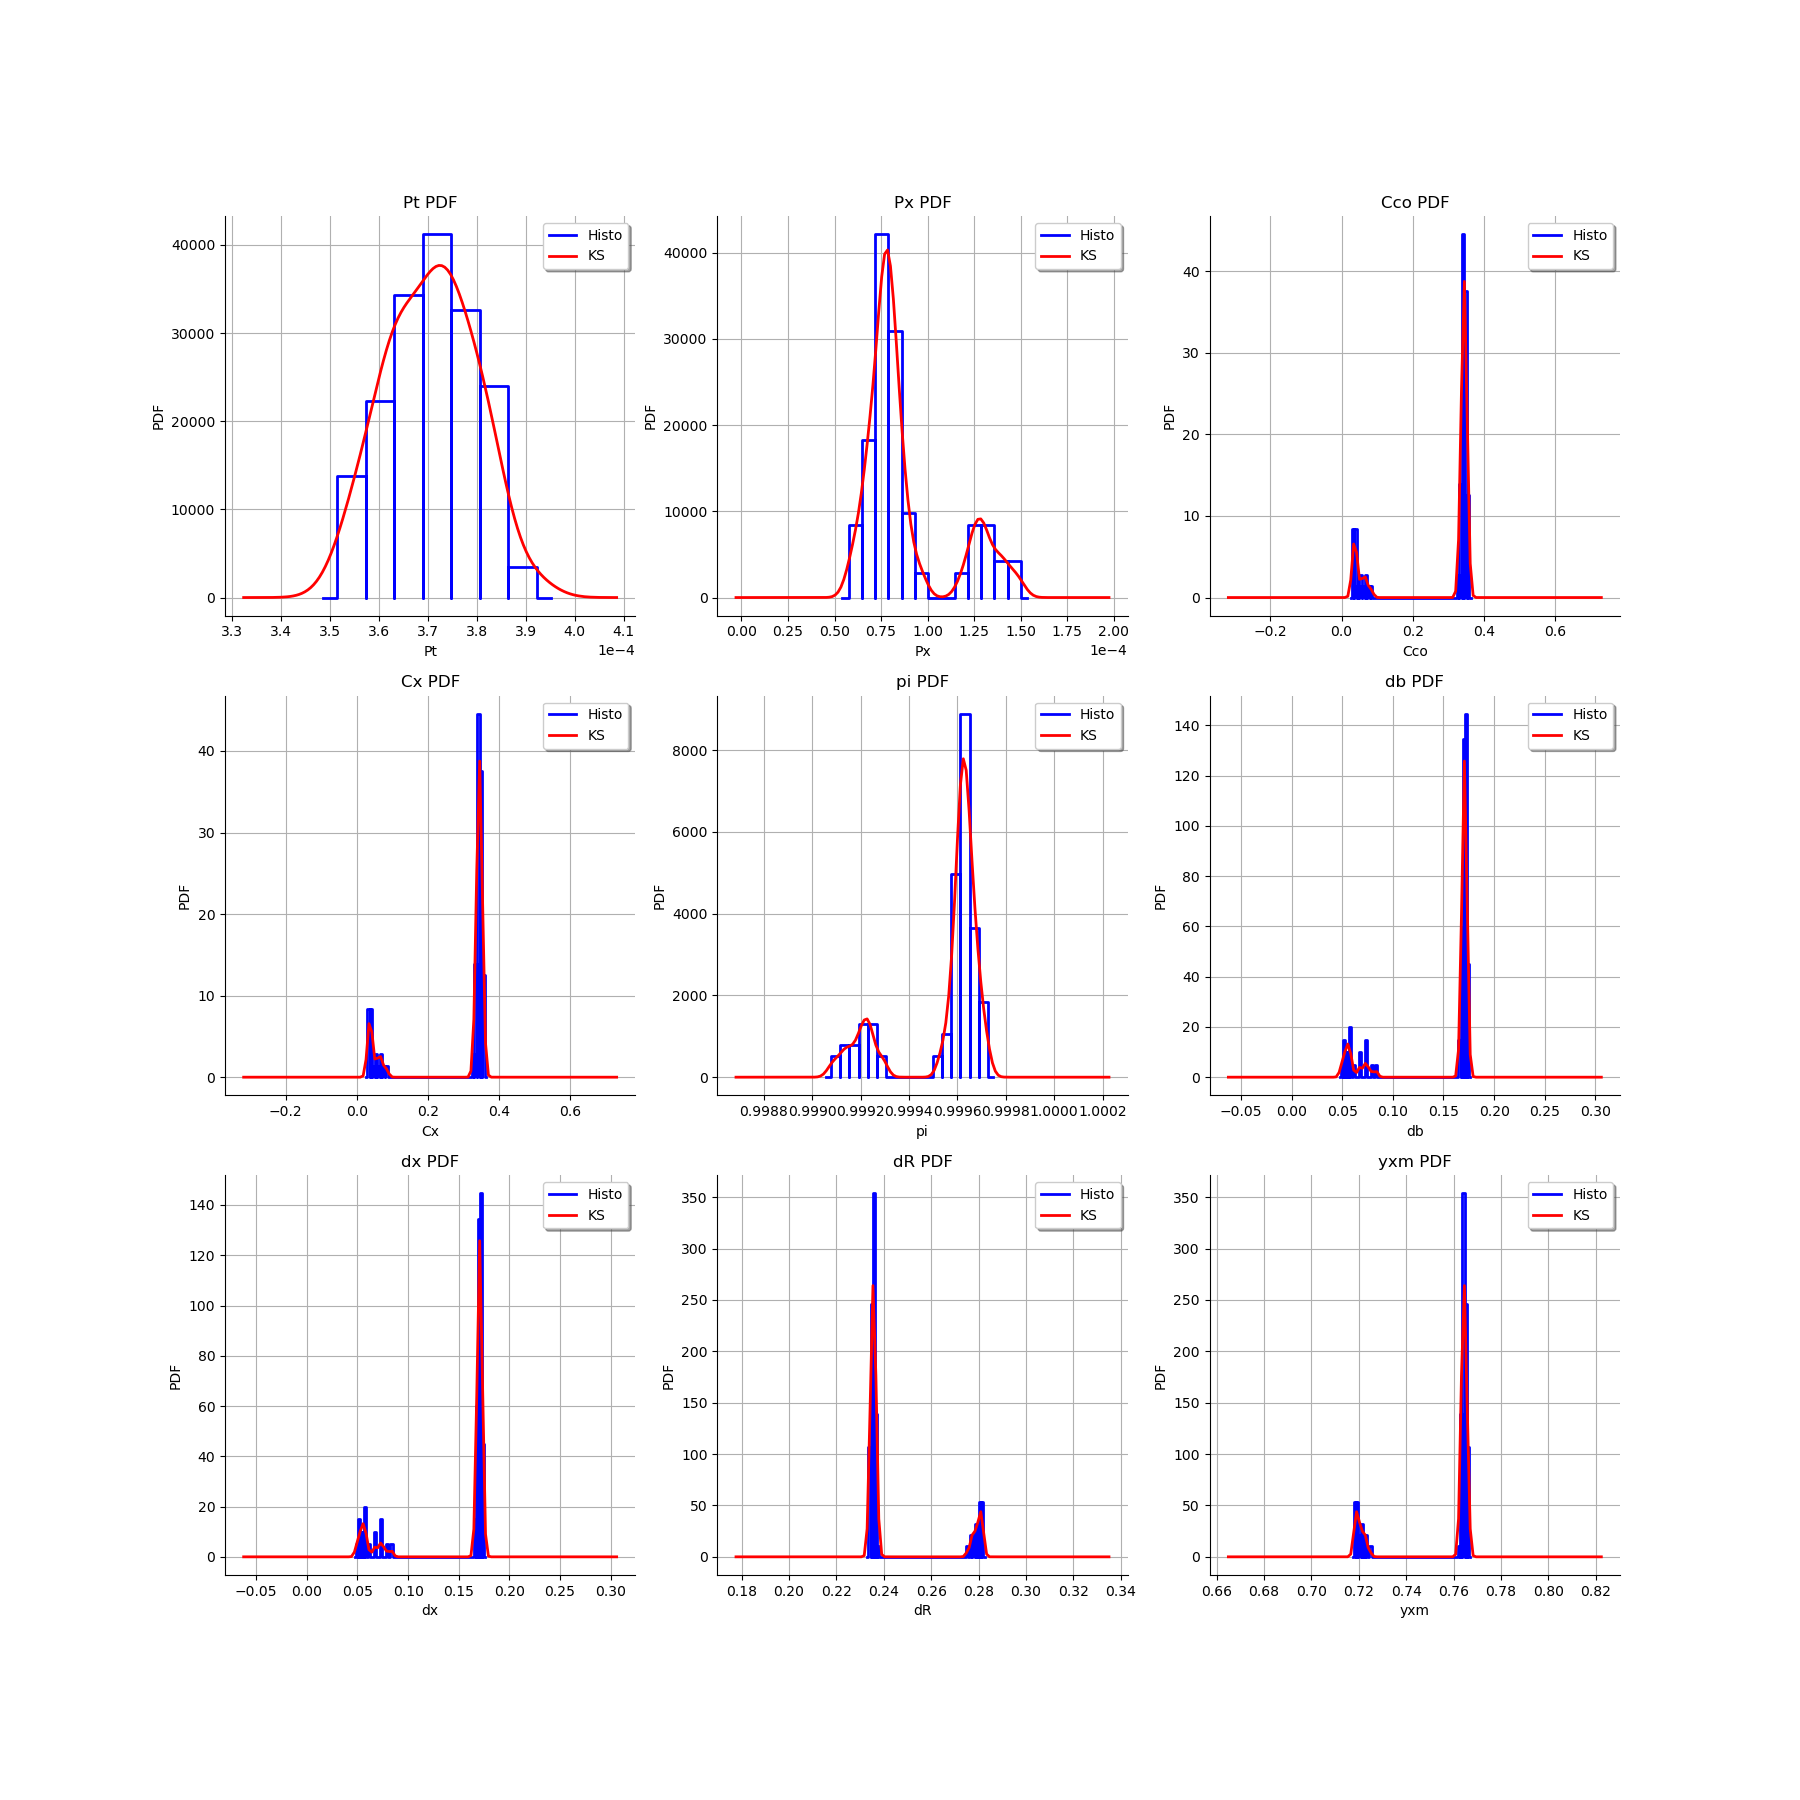

In [20]:
gl = ot.GridLayout(3,3)
for k in range(len(graphMarg_list)):
    gl.setGraph(k//3, k%3, graphMarg_list[k])
gl

**Graphically analyse the bootstrap sample of the ECLM probabilities**

We create the Pairs graphs of all the ECLM probabilities. We limit the graphical study to the multiplicities lesser than $k_{max}$.

In [21]:
kMax = 5

graphPairs_list, graphPEG_PES_PTS_list, graphMargPEG_list, graphMargPSG_list, graphMargPES_list, graphMargPTS_list, desc_list = myECLM.analyseGraphsECLMProbabilities(fileNameECLMProbabilities, kMax)

In [22]:
descPairs = desc_list[0]
descPEG_PES_PTS = desc_list[1]
descMargPEG = desc_list[2]
descMargPSG = desc_list[3]
descMargPES = desc_list[4]
descMargPTS = desc_list[5]

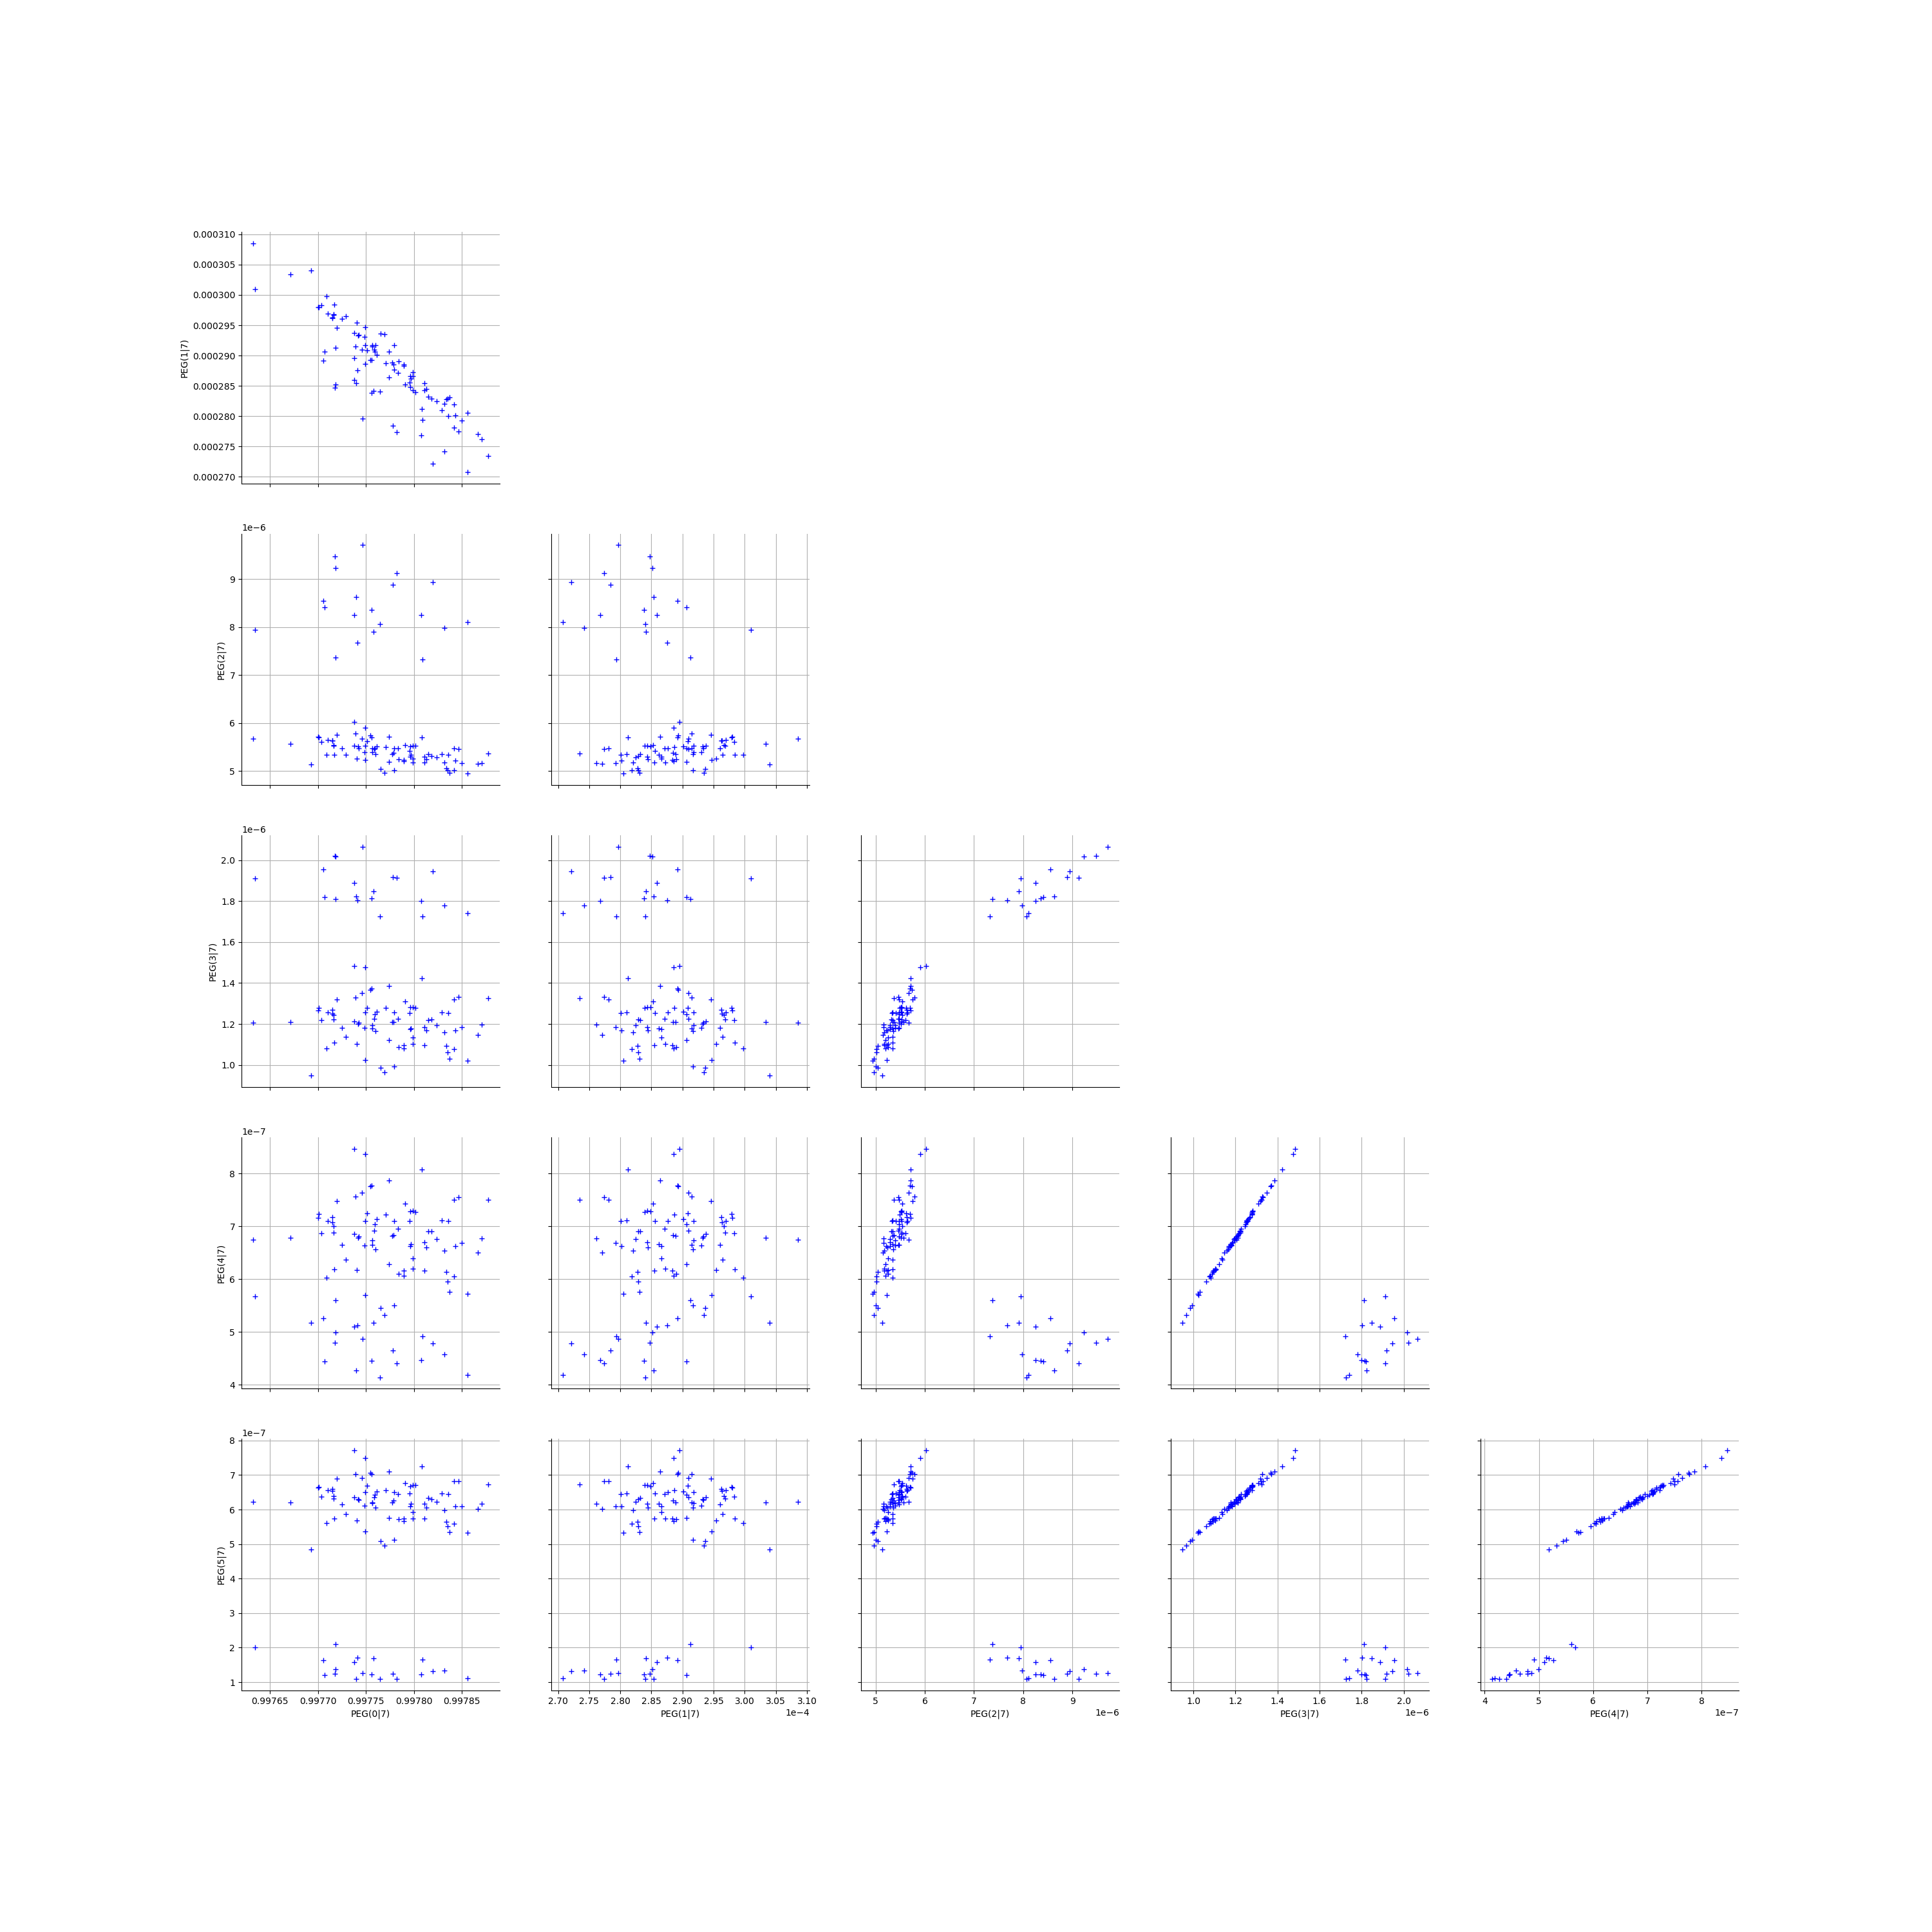

In [23]:
graphPairs_list[0]

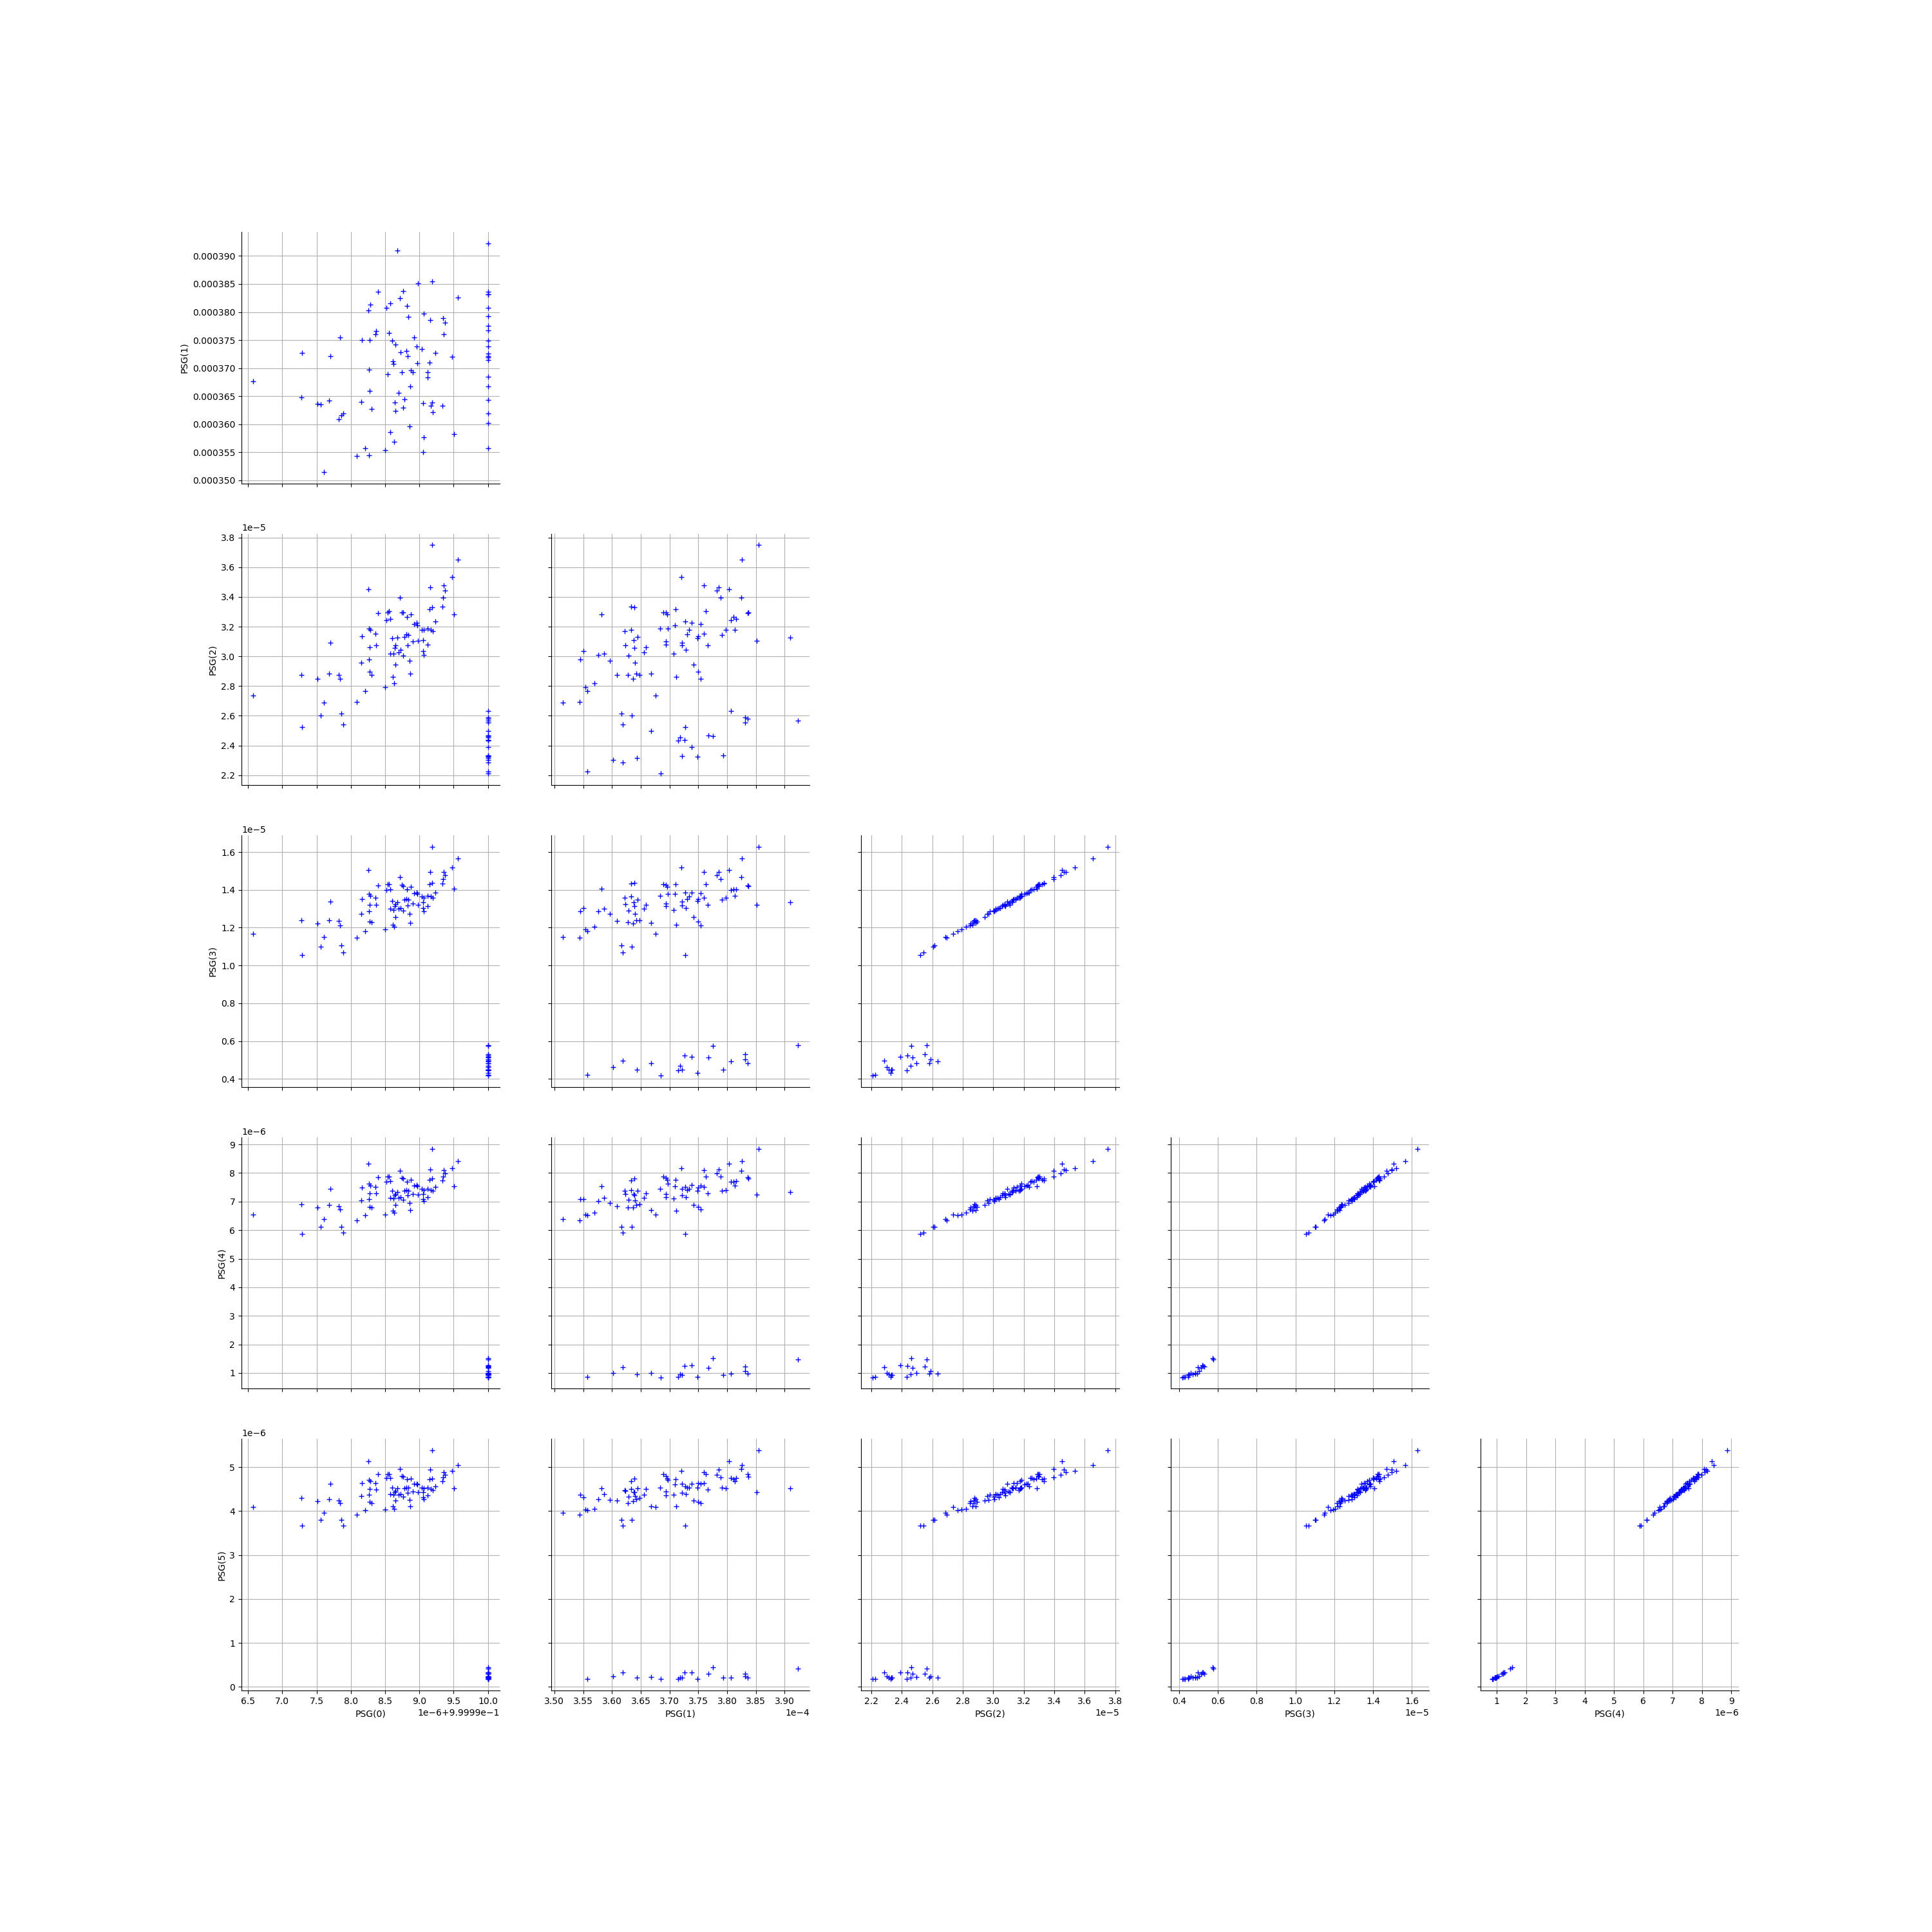

In [24]:
graphPairs_list[1]

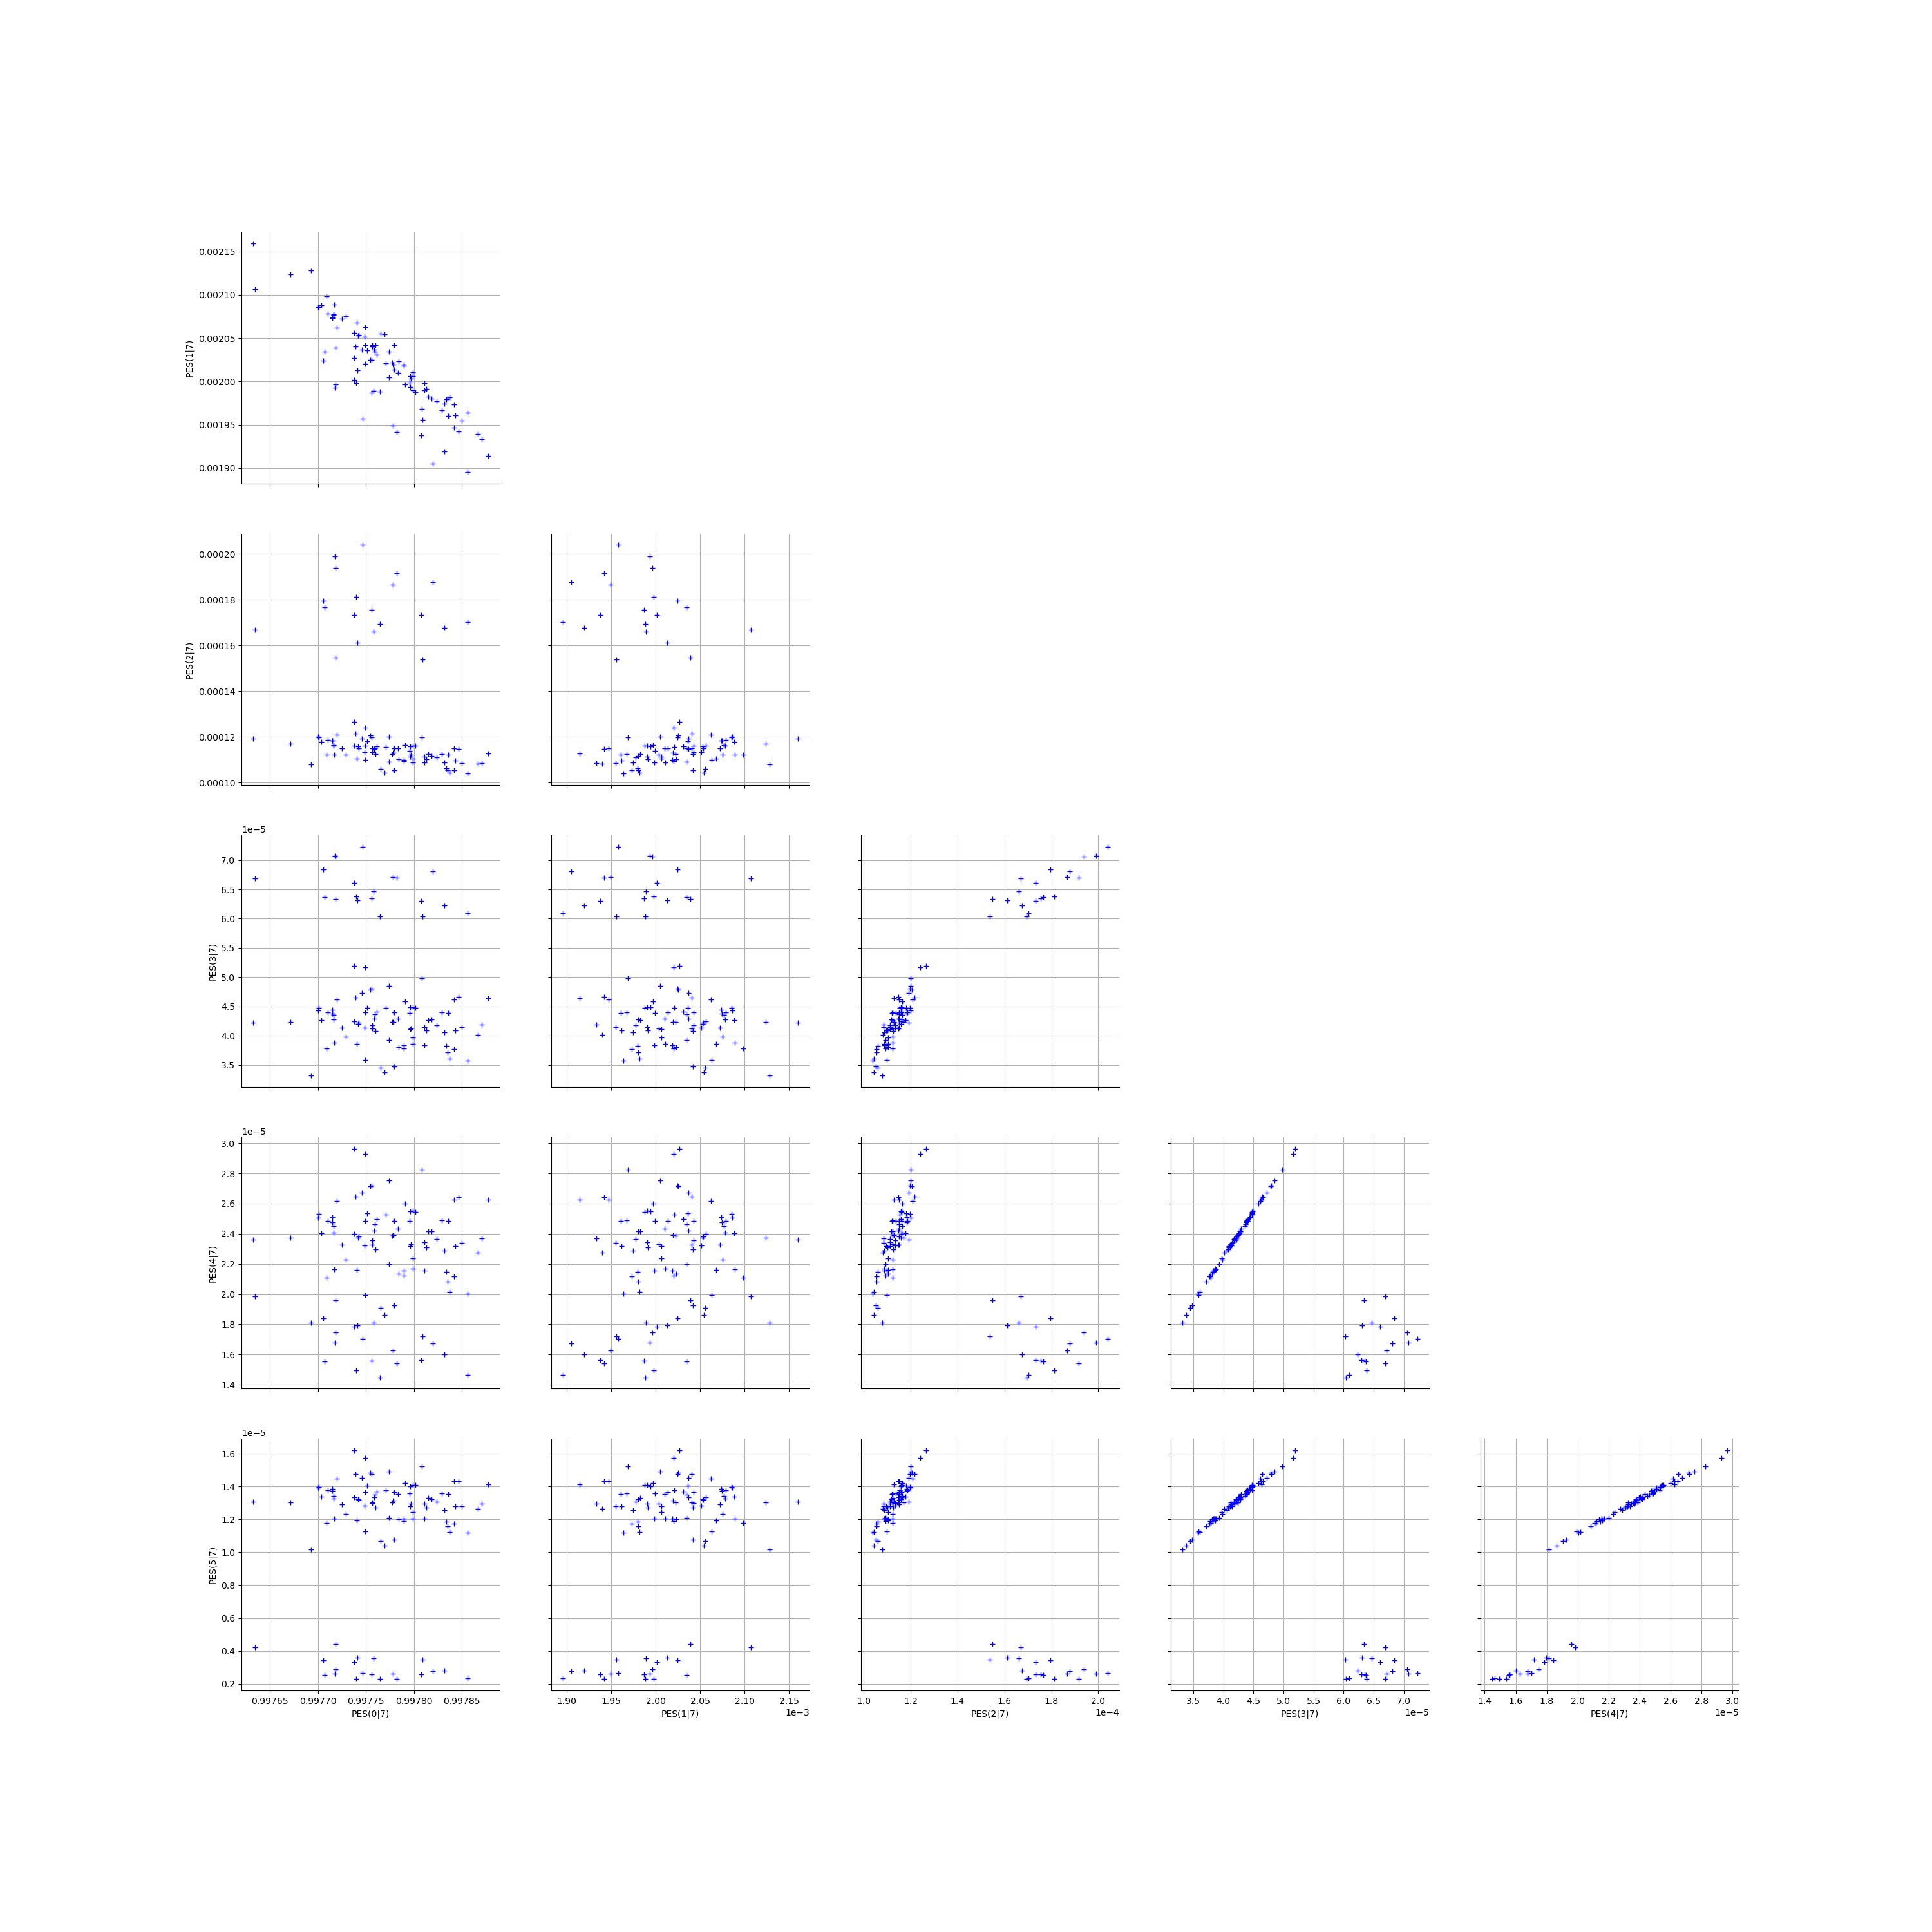

In [25]:
graphPairs_list[2]

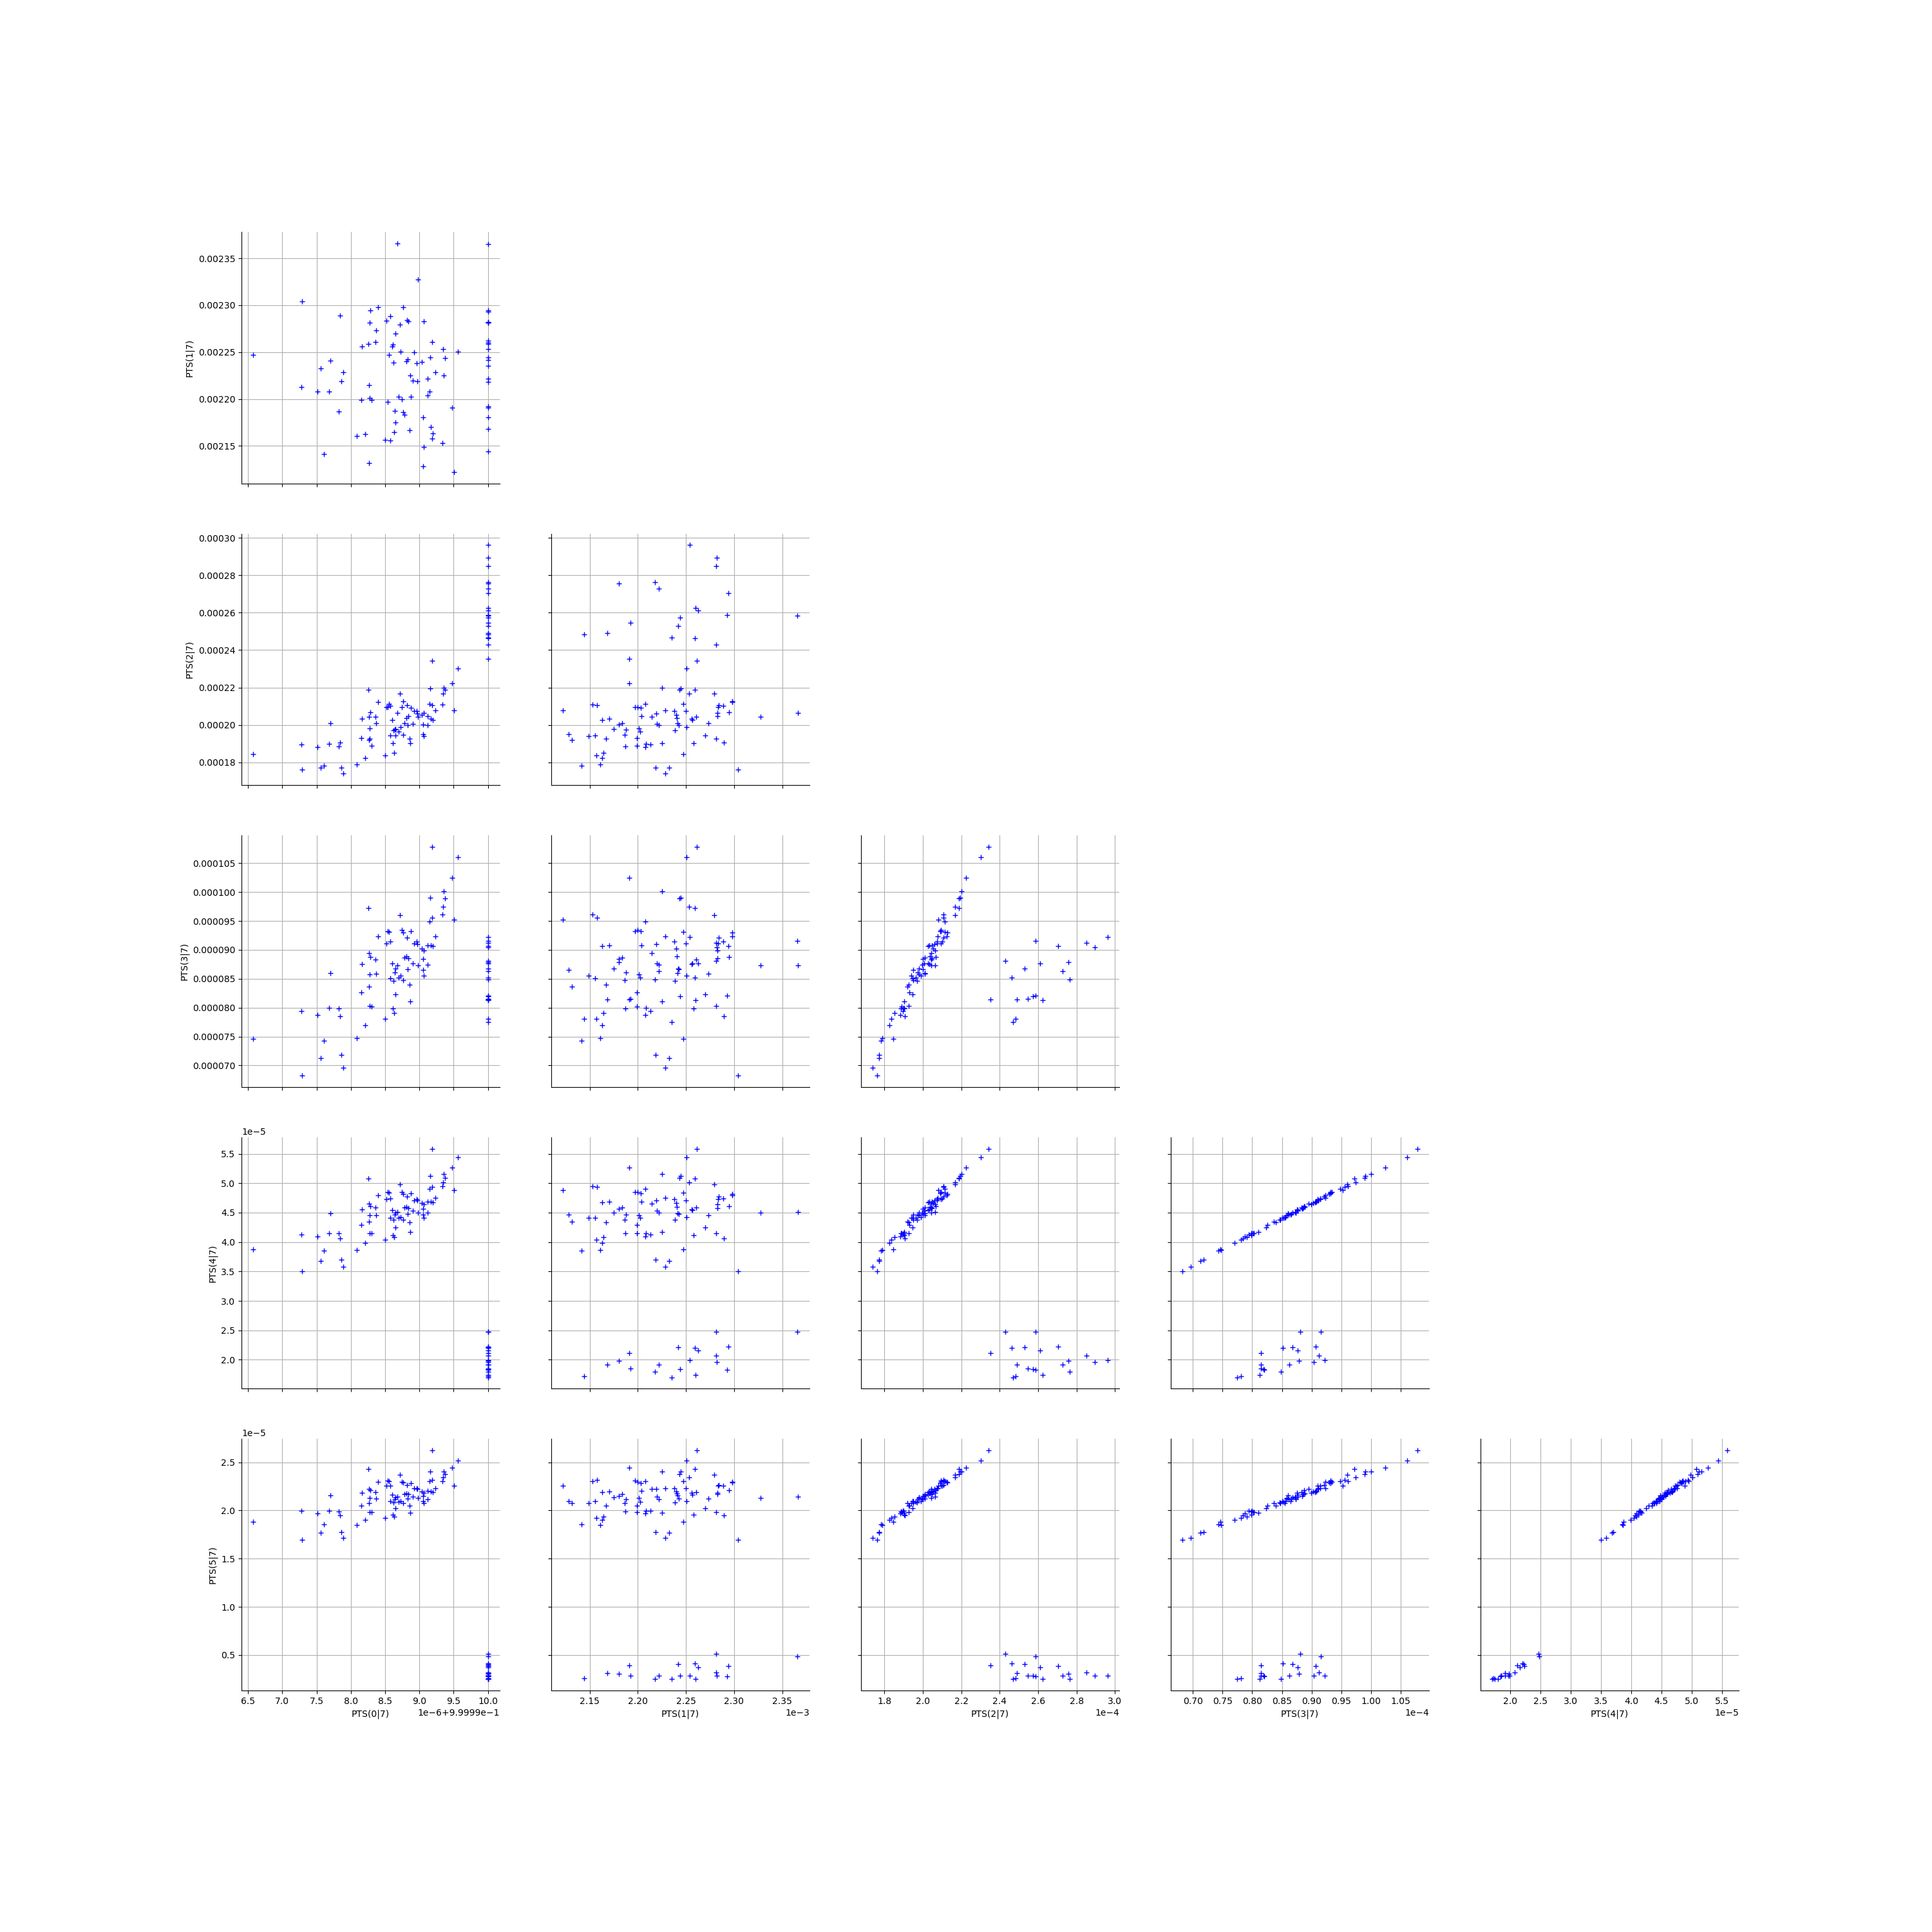

In [26]:
graphPairs_list[3]

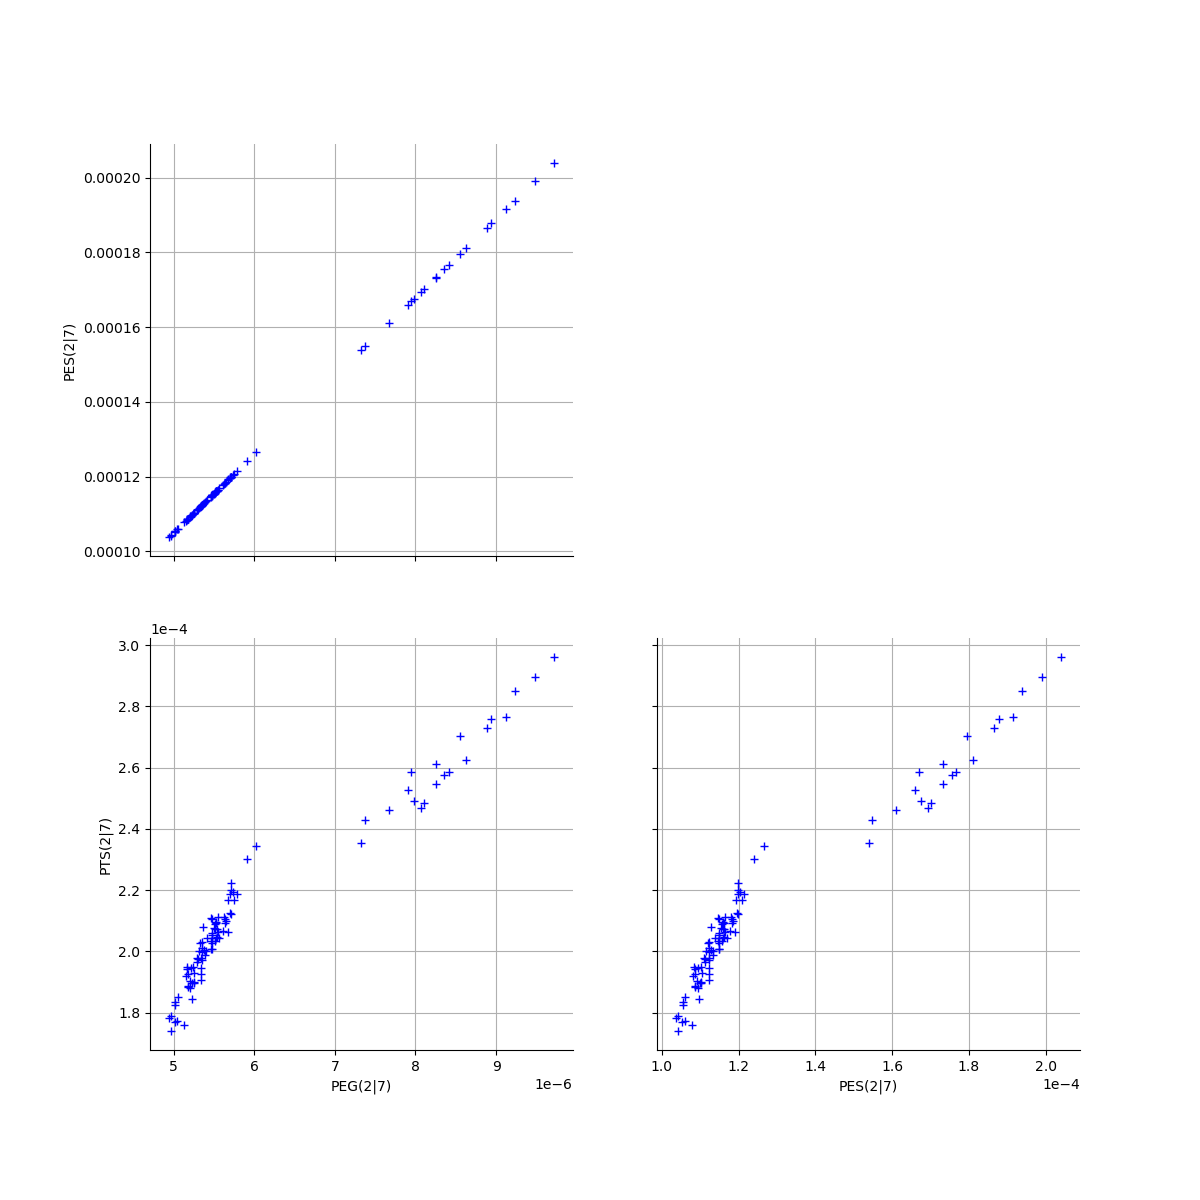

In [38]:
# Fix a k <=kMax
k = 0
graphPEG_PES_PTS_list[k]

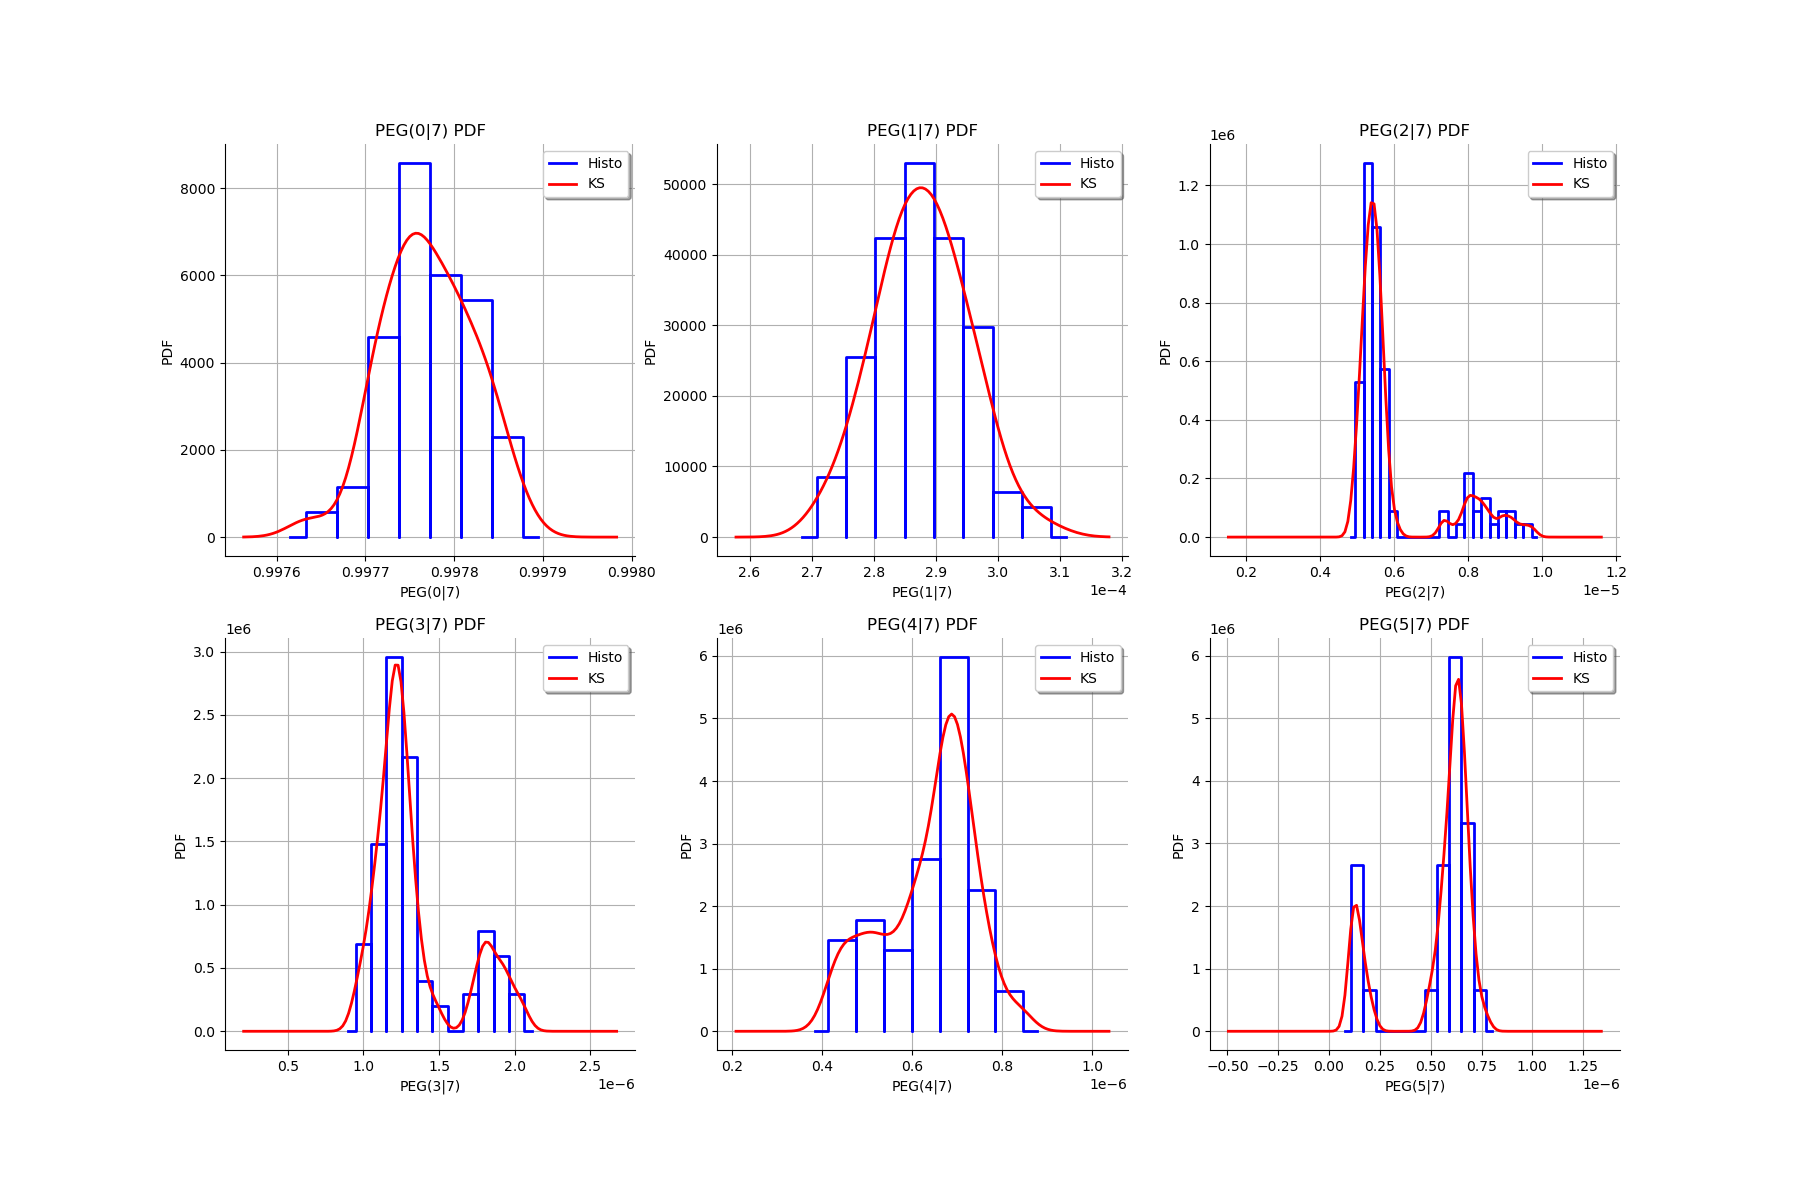

In [40]:
len(graphMargPEG_list)
gl = ot.GridLayout(2,3)
for k in range(len(graphMargPEG_list)):
    gl.setGraph(k//3, k%3, graphMargPEG_list[k])
gl

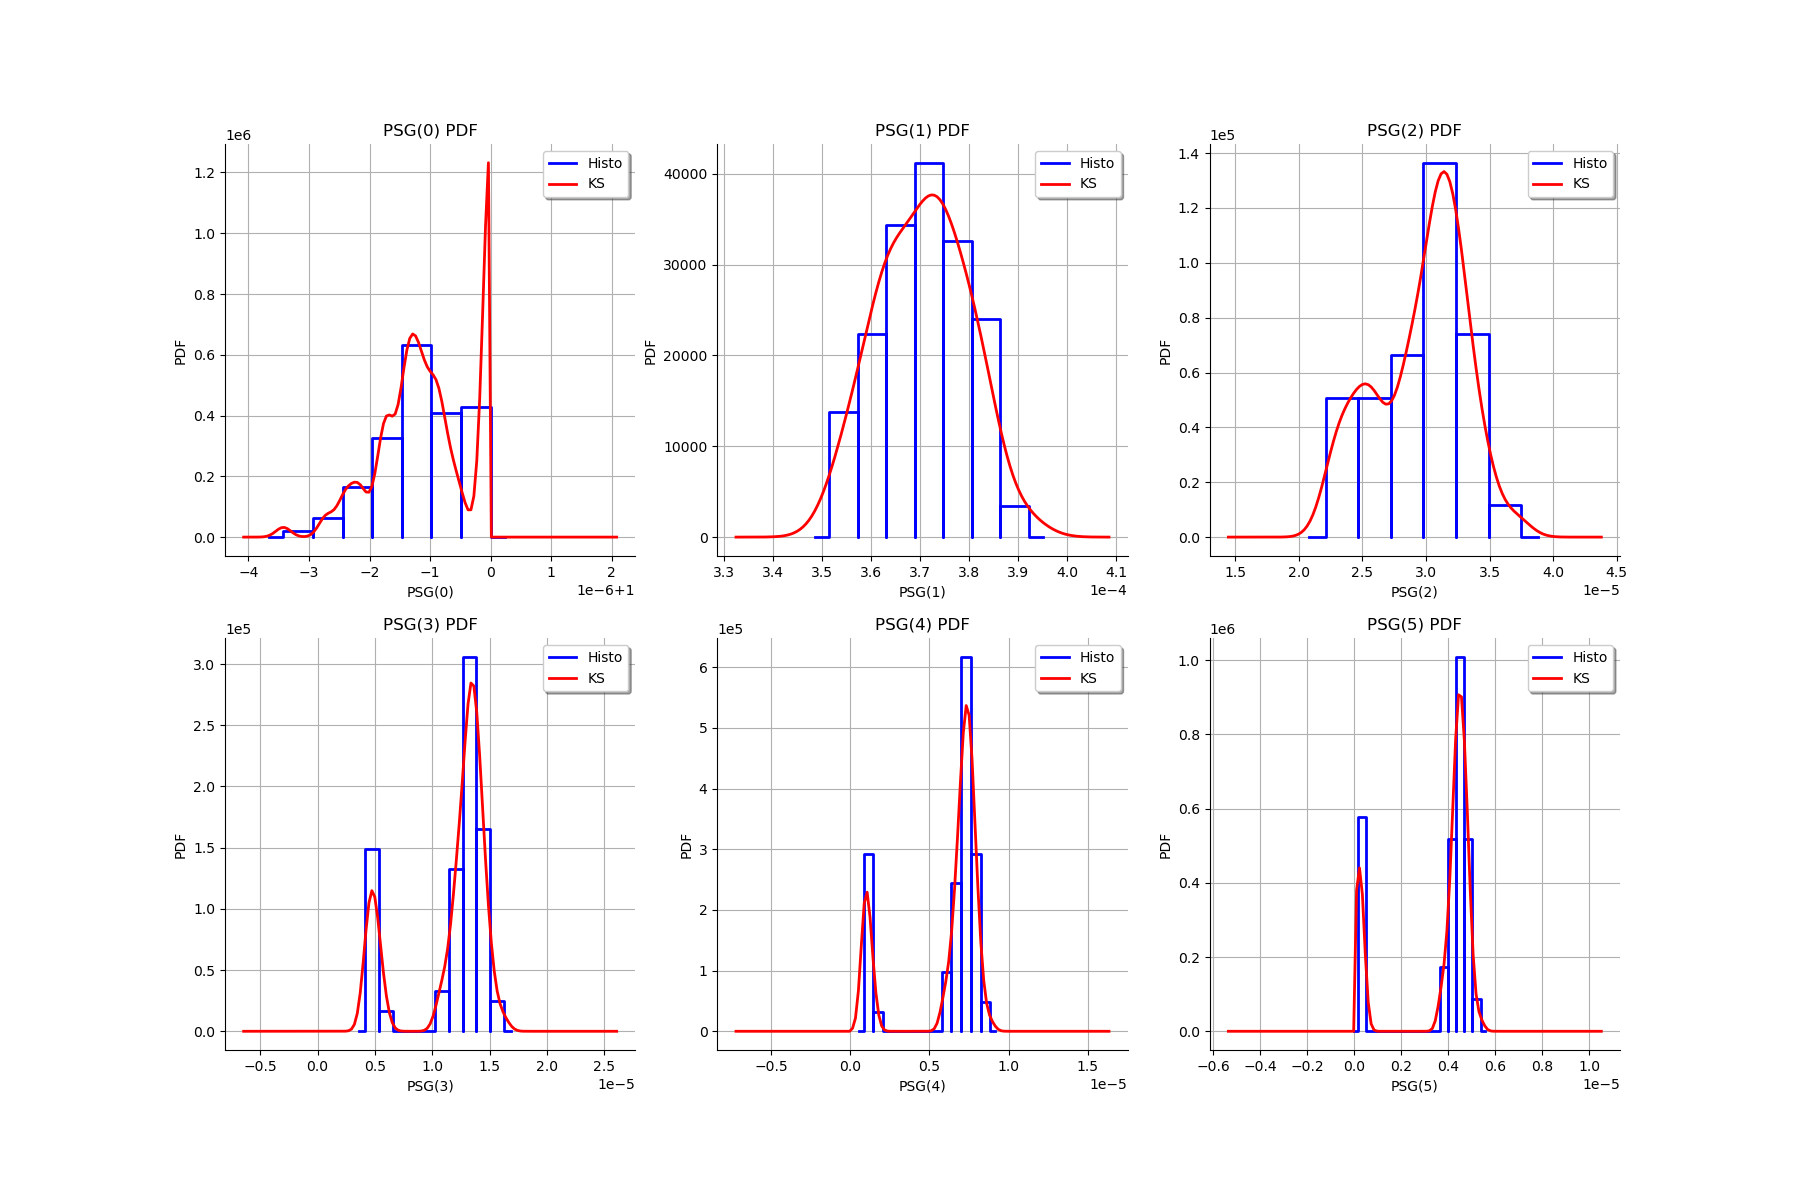

In [41]:
gl = ot.GridLayout(2,3)
for k in range(len(graphMargPSG_list)):
    gl.setGraph(k//3, k%3, graphMargPSG_list[k])
gl    

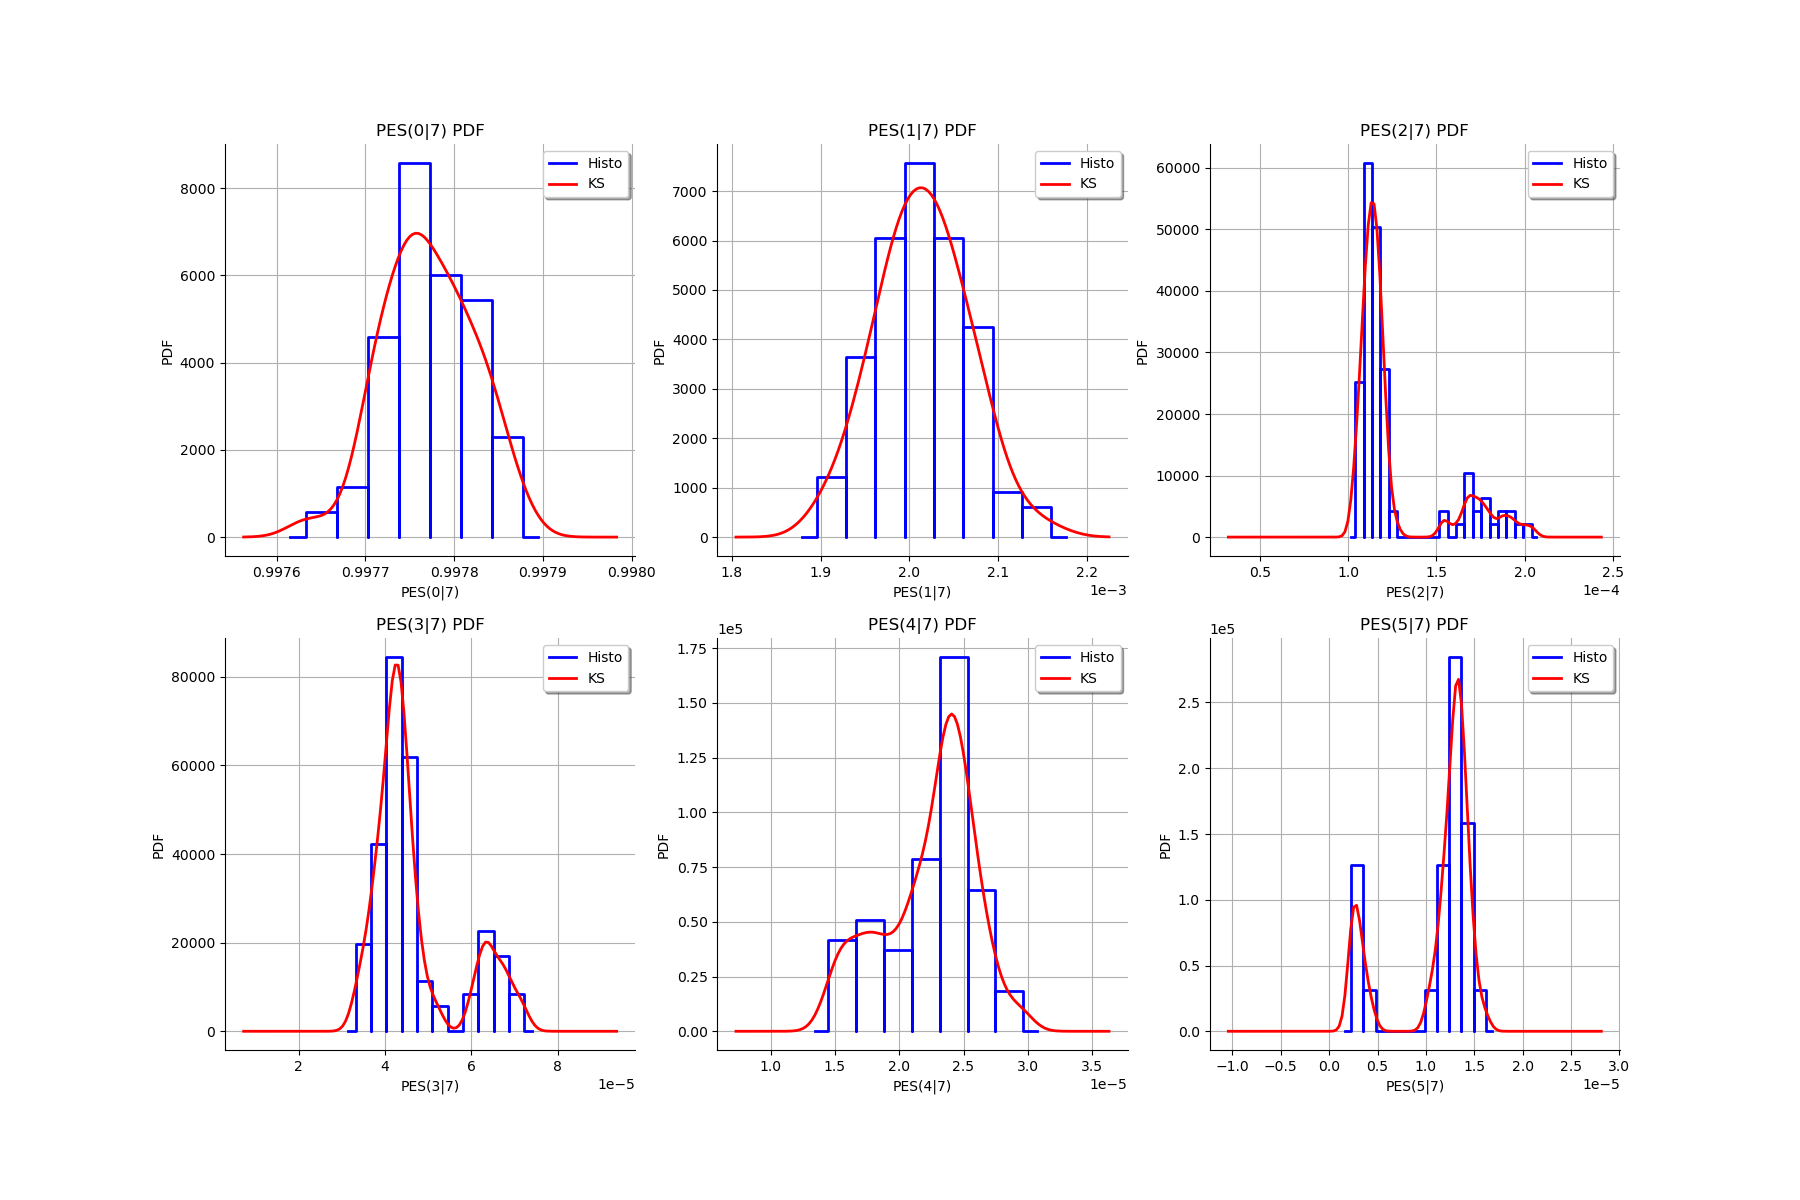

In [42]:
gl = ot.GridLayout(2,3)
for k in range(len(graphMargPES_list)):
    gl.setGraph(k//3, k%3, graphMargPES_list[k])
gl    

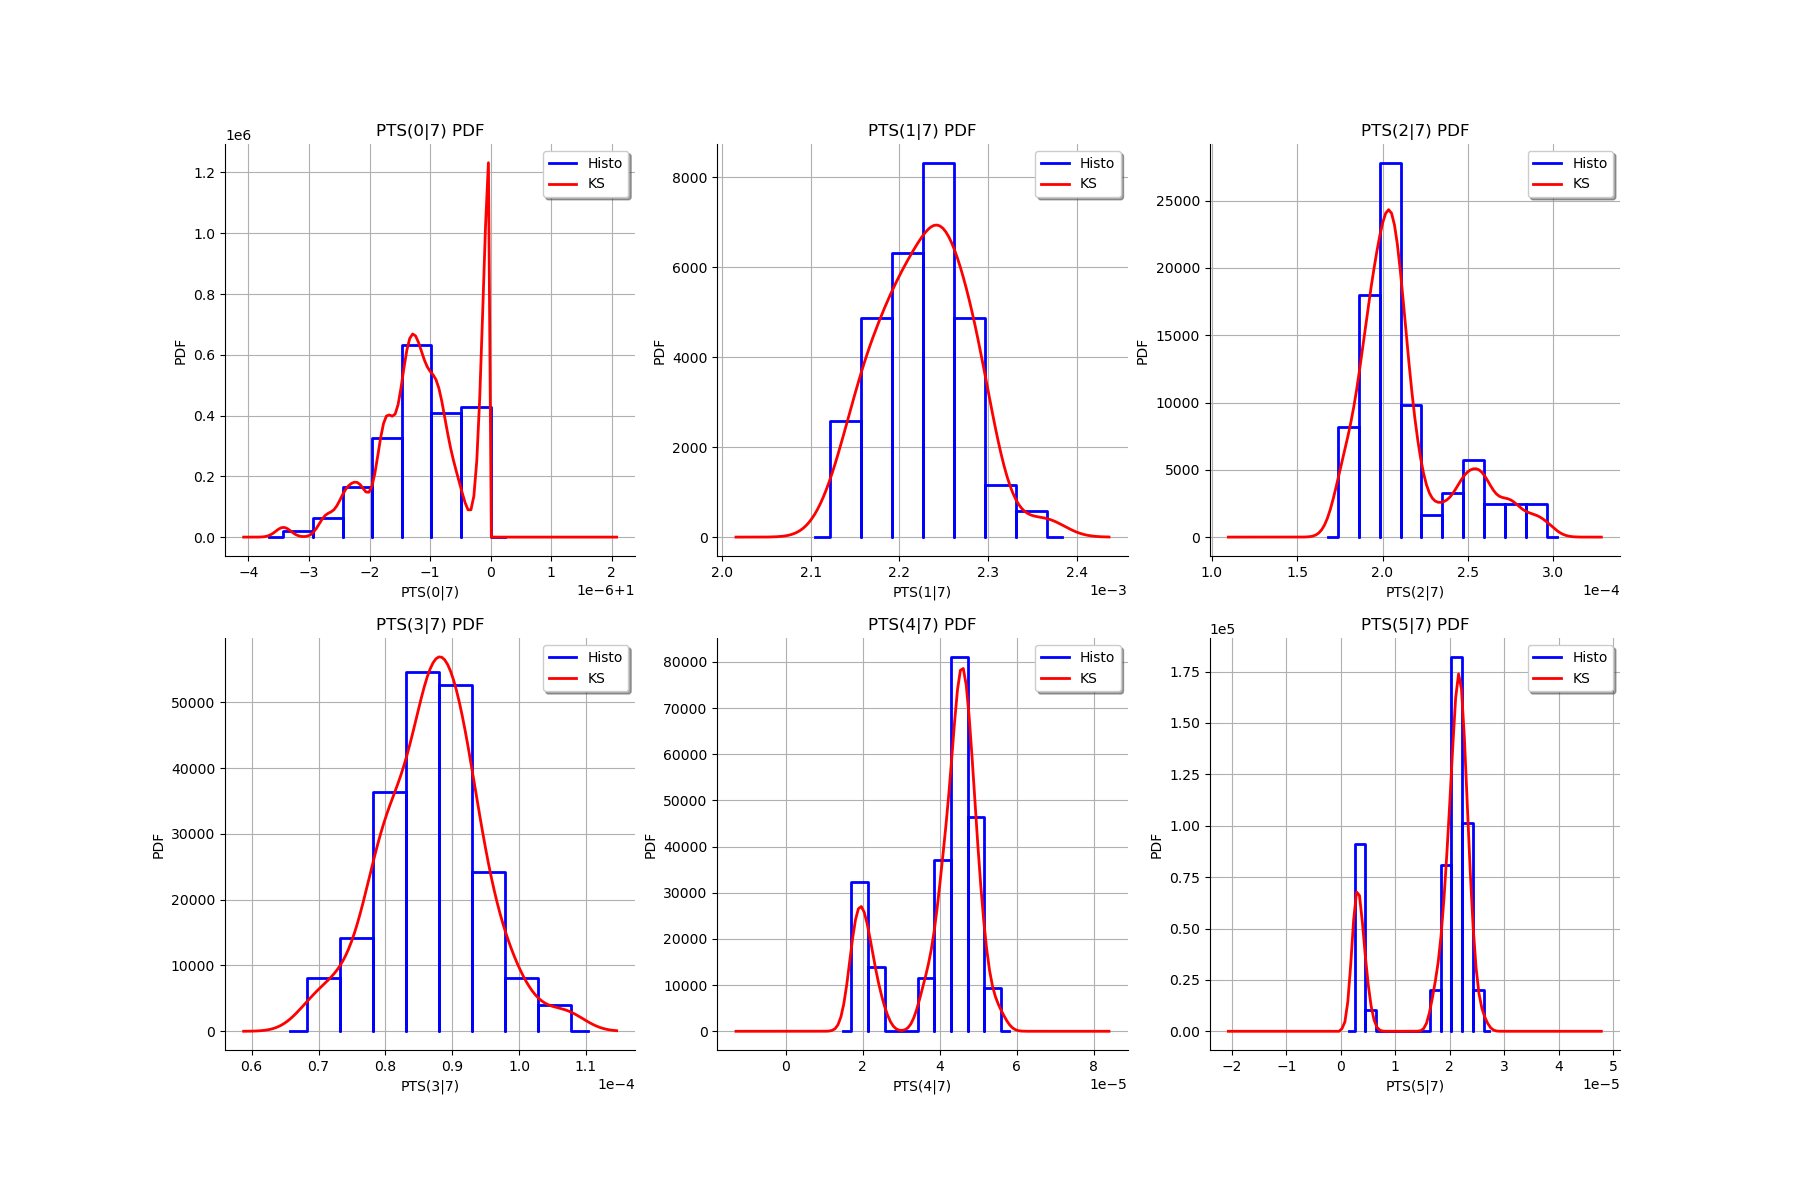

In [43]:
gl = ot.GridLayout(2,3)
for k in range(len(graphMargPTS_list)):
    gl.setGraph(k//3, k%3, graphMargPTS_list[k])
gl    

**Fit a distribution to the ECLM probabilities**

We fit a distribution among a given list to each ECLM probability. We test it with the Lilliefors test. 
We also compute the confidence interval of the specified level.

In [44]:
factoryColl = [ot.BetaFactory(), ot.LogNormalFactory(), ot.GammaFactory()]
confidenceLevel = 0.9
IC_list, graphMarg_list, descMarg_list = myECLM.analyseDistECLMProbabilities(fileNameECLMProbabilities, kMax, confidenceLevel, factoryColl)

IC_PEG_list, IC_PSG_list, IC_PES_list, IC_PTS_list = IC_list
graphMargPEG_list, graphMargPSG_list, graphMargPES_list, graphMargPTS_list = graphMarg_list
descMargPEG, descMargPSG, descMargPES, descMargPTS = descMarg_list

Test de Lilliefors

Ordre k= 0
Best model PEG( 0 |n) :  Gamma(k = 38292.5, lambda = 3.86051e+06, gamma = 0.987852) p-value =  0.6095717884130982
Best model PSG( 0 |n) :  Gamma(k = 1.65362e+08, lambda = 1.6863e+10, gamma = 0.990193) p-value =  0.000999000999000999
Best model PES( 0 |n) :  Gamma(k = 38292.5, lambda = 3.86051e+06, gamma = 0.987852) p-value =  0.5893520429219975
Best model PTS( 0 |n) :  Gamma(k = 1.65362e+08, lambda = 1.6863e+10, gamma = 0.990193) p-value =  0.0

Test de Lilliefors

Ordre k= 1
Best model PEG( 1 |n) :  LogNormal(muLog = -8.64607, sigmaLog = 0.0411927, gamma = 0.00011188) p-value =  0.955044955044955
Best model PSG( 1 |n) :  Beta(alpha = 2.0922, beta = 2.36032, a = 0.000351093, b = 0.000392658) p-value =  0.6560565870910698
Best model PES( 1 |n) :  LogNormal(muLog = -6.70016, sigmaLog = 0.0411927, gamma = 0.000783163) p-value =  0.957042957042957
Best model PTS( 1 |n) :  Beta(alpha = 2.1325, beta = 2.77135, a = 0.00211989, b = 0.00236849) p-value =  0.342919

In [45]:
for k in range(len(IC_PEG_list)):
    print('IC_PEG_', k, ' = ', IC_PEG_list[k])

for k in range(len(IC_PSG_list)):
    print('IC_PSG_', k, ' = ', IC_PSG_list[k])

for k in range(len(IC_PES_list)):
    print('IC_PES_', k, ' = ', IC_PES_list[k])

for k in range(len(IC_PTS_list)):
    print('IC_PTS_', k, ' = ', IC_PTS_list[k])

IC_PEG_ 0  =  [0.997684, 0.997861]
IC_PEG_ 1  =  [0.000274683, 0.000301107]
IC_PEG_ 2  =  [4.98728e-06, 8.90577e-06]
IC_PEG_ 3  =  [1.01043e-06, 1.94417e-06]
IC_PEG_ 4  =  [4.41542e-07, 7.8566e-07]
IC_PEG_ 5  =  [1.12323e-07, 7.16122e-07]
IC_PSG_ 0  =  [0.999998, 1]
IC_PSG_ 1  =  [0.000354533, 0.000386447]
IC_PSG_ 2  =  [2.30372e-05, 3.48791e-05]
IC_PSG_ 3  =  [4.3629e-06, 1.50937e-05]
IC_PSG_ 4  =  [8.25574e-07, 8.22555e-06]
IC_PSG_ 5  =  [1.37716e-07, 5.01132e-06]
IC_PES_ 0  =  [0.997684, 0.997861]
IC_PES_ 1  =  [0.00192278, 0.00210775]
IC_PES_ 2  =  [0.000104733, 0.000187021]
IC_PES_ 3  =  [3.53654e-05, 6.80458e-05]
IC_PES_ 4  =  [1.54541e-05, 2.74977e-05]
IC_PES_ 5  =  [2.35879e-06, 1.50386e-05]
IC_PTS_ 0  =  [0.999998, 1]
IC_PTS_ 1  =  [0.00213786, 0.00231474]
IC_PTS_ 2  =  [0.000178868, 0.000273956]
IC_PTS_ 3  =  [7.35802e-05, 9.97068e-05]
IC_PTS_ 4  =  [1.80019e-05, 5.18137e-05]
IC_PTS_ 5  =  [2.49489e-06, 2.4346e-05]


We draw all the estimated distributions and the title gives the best model.

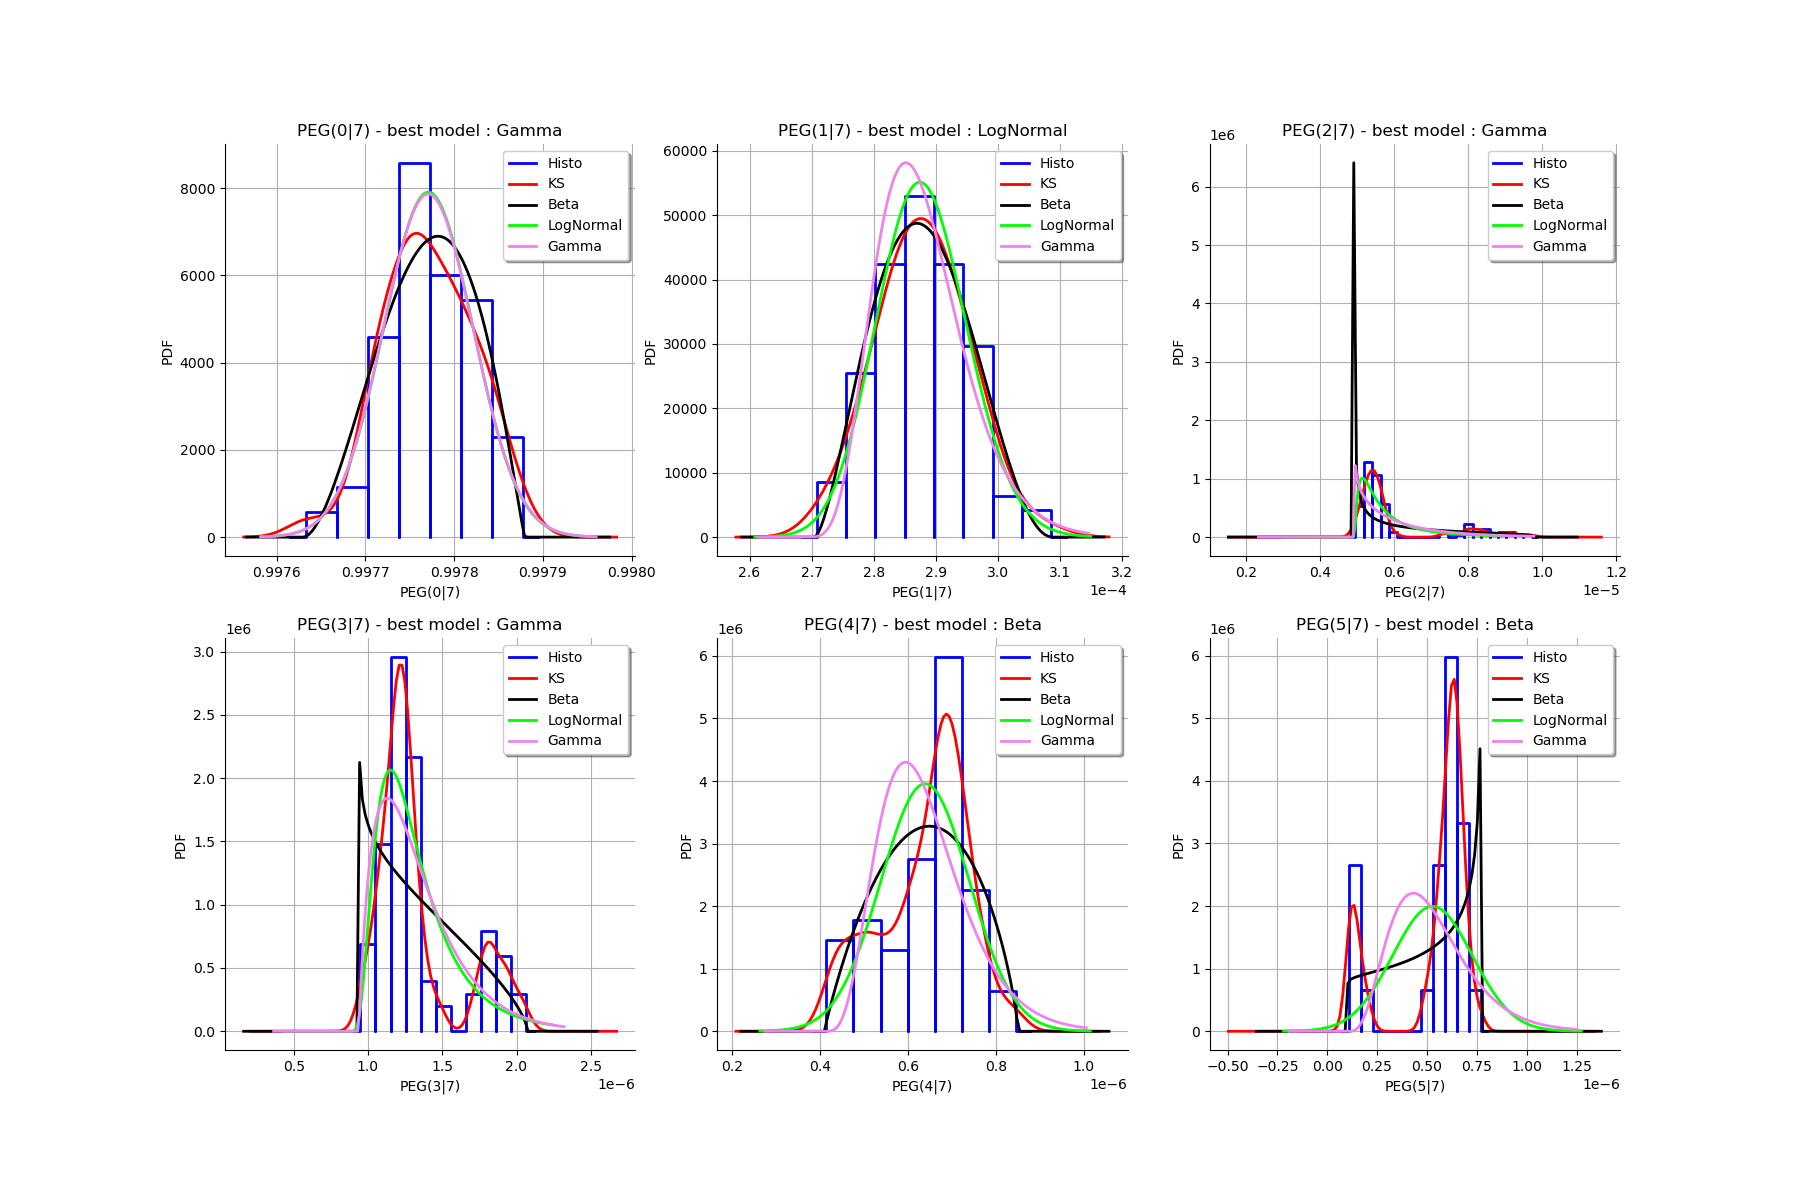

In [46]:
gl = ot.GridLayout(2,3)
for k in range(len(graphMargPEG_list)):
    gl.setGraph(k//3, k%3, graphMargPEG_list[k])
gl

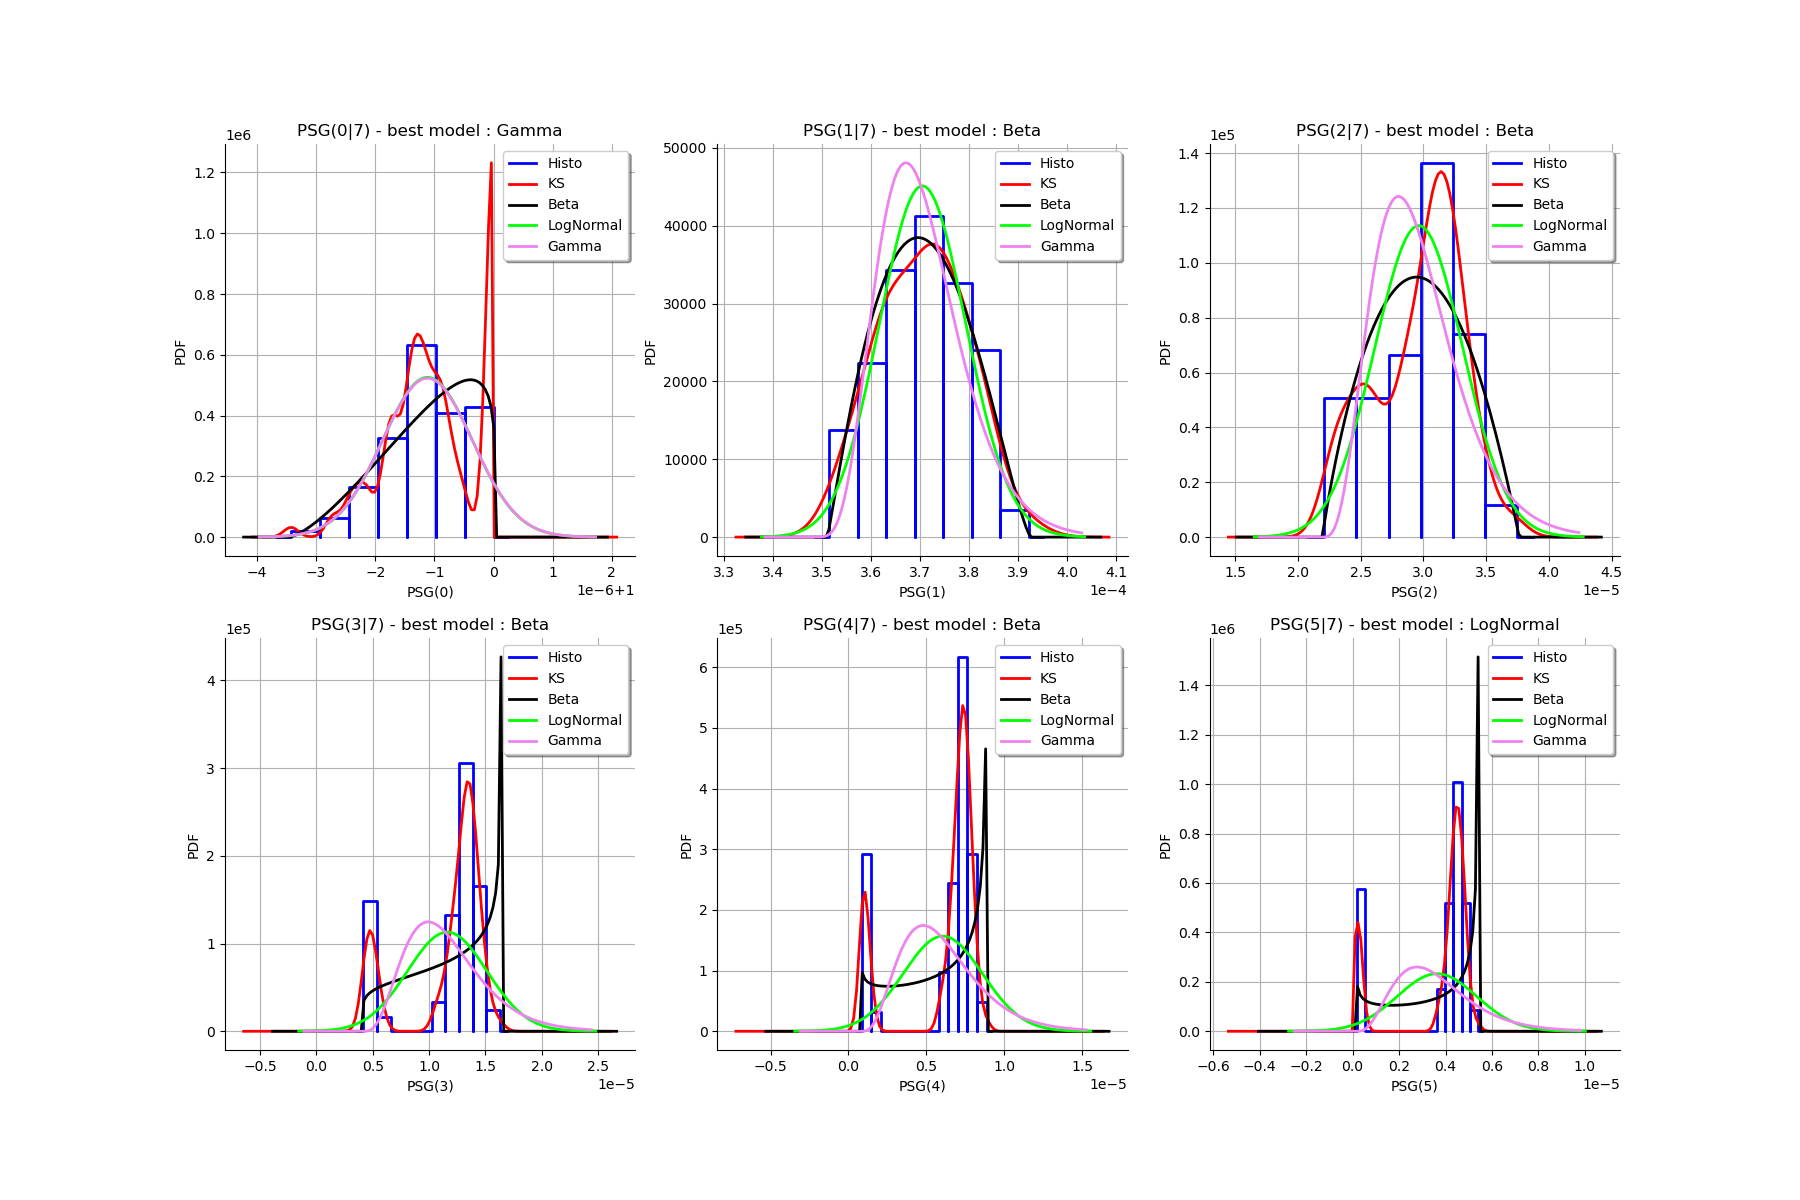

In [47]:
gl = ot.GridLayout(2,3)
for k in range(len(graphMargPSG_list)):
    gl.setGraph(k//3, k%3, graphMargPSG_list[k])
gl

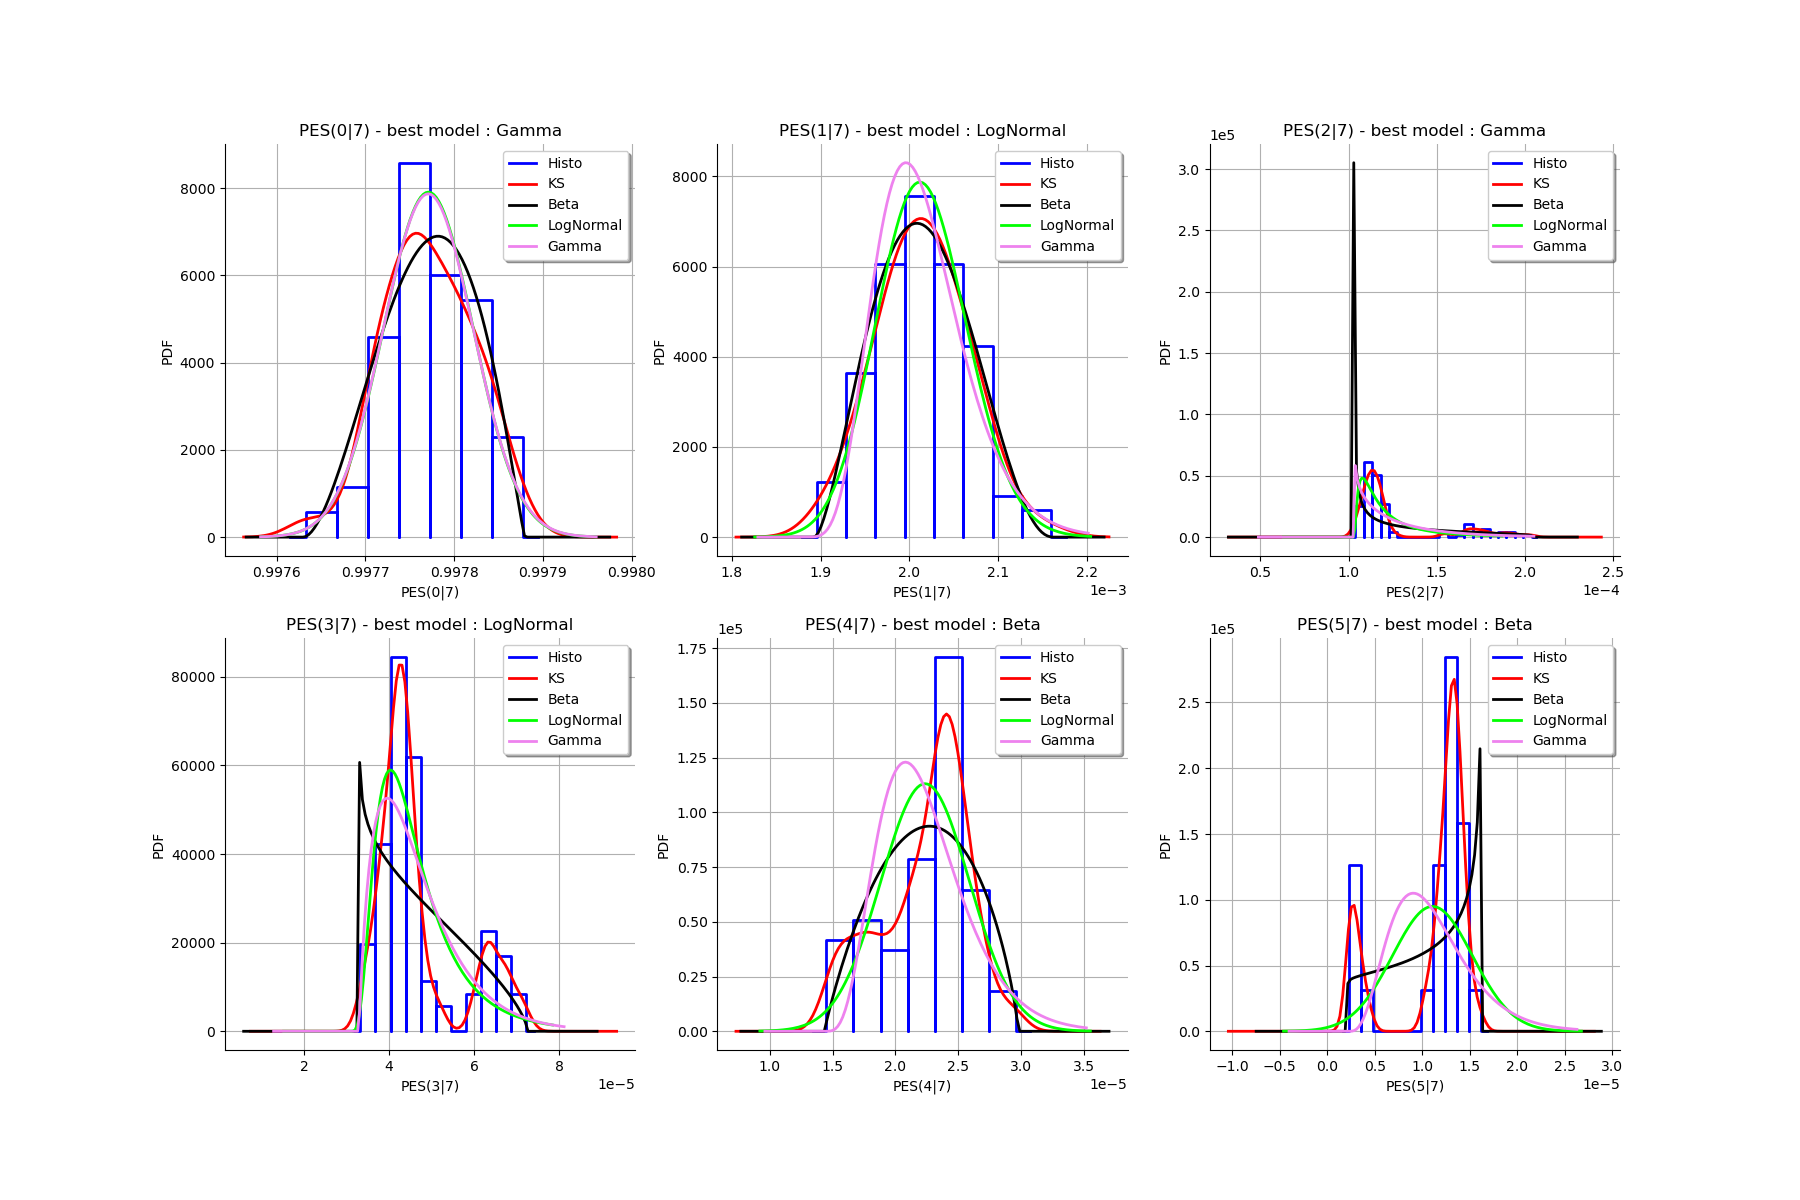

In [48]:
gl = ot.GridLayout(2,3)
for k in range(len(graphMargPES_list)):
        gl.setGraph(k//3, k%3, graphMargPES_list[k])
gl

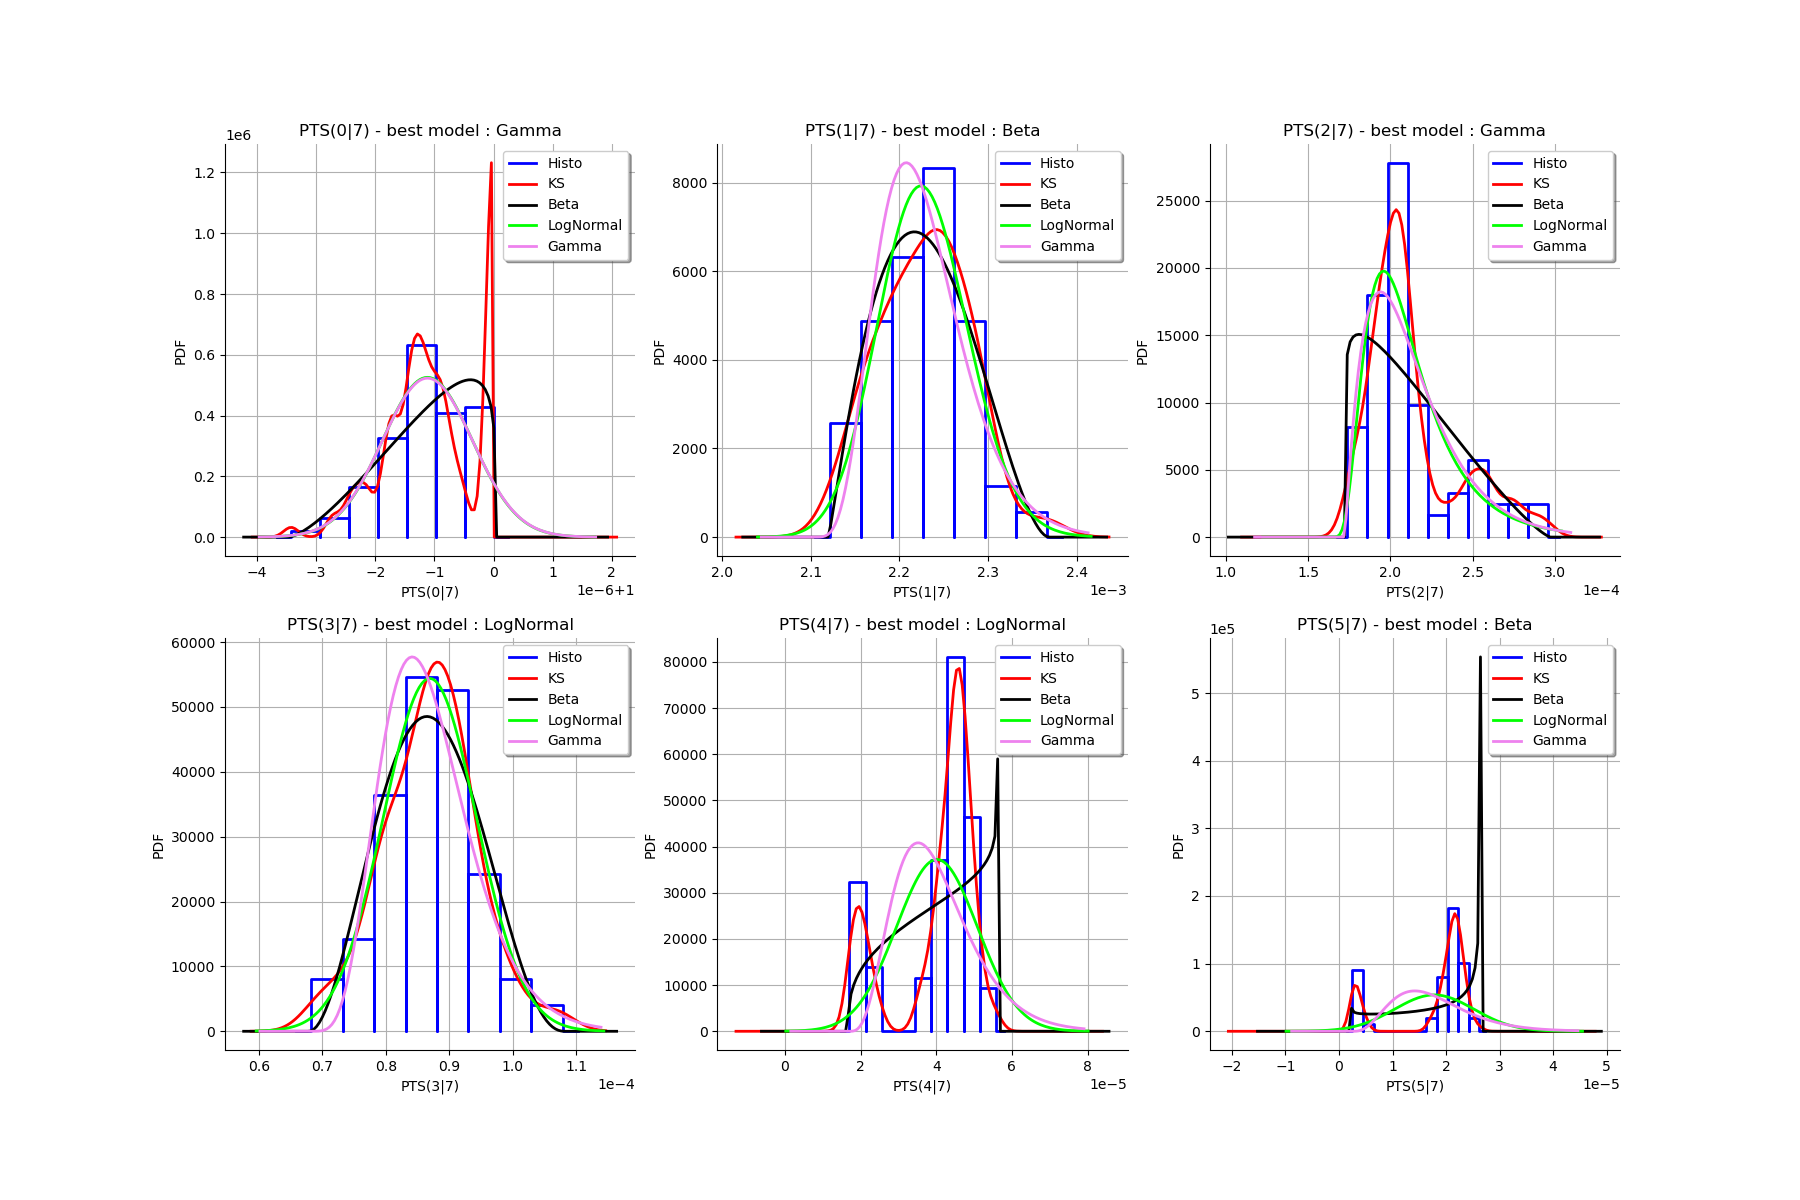

In [49]:
gl = ot.GridLayout(2,3)
for k in range(len(graphMargPTS_list)):
    gl.setGraph(k//3, k%3, graphMargPTS_list[k])
gl

**Analyse the minimal multiplicity which probability is greater than a given threshold**

We fix *p* and we get the minimal multiplicity $k_{max}$ such that :
$$
k_{max} = \arg\max \{k| \mbox{PTS}(k|n) \geq p \}
$$

In [50]:
p = 1.0e-5
nameSeuil = '10M5'

In [51]:
kMax = myECLM.computeKMaxPTS(p)
print('kMax = ', kMax)

kMax =  5


Then we use the bootstrap sample of the Mankamo parameters to generate a sample of $k_{max}$. We analyse the distribution of $k_{max}$: we estimate it with the empirical distribution and we derive a confidence interval of order $90\%$.

In [52]:
fileNameSampleParam = 'sampleParamFromMankamo_{}.csv'.format(Nbootstrap)
fileNameSampleKmax = 'sampleKmaxFromMankamo_{}_{}.csv'.format(Nbootstrap, nameSeuil)
gKmax = myECLM.computeAnalyseKMaxSample(p, blockSize, fileNameSampleParam, fileNameSampleKmax)

Intervalle de confiance de niveau 90%: [ 4.0 ,  5.0 ]


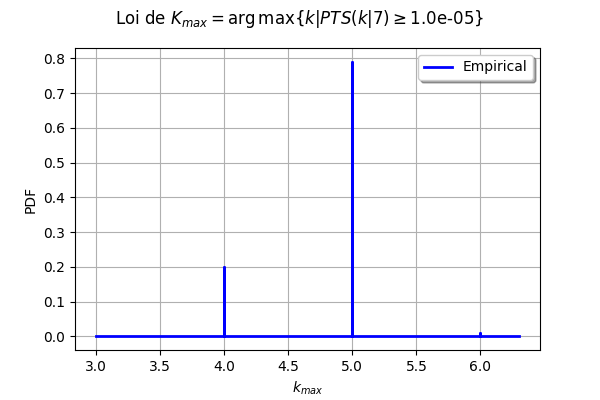

In [34]:
gKmax